# Predicting Customer Churn in the Telecom Industry

==The introduction section should contain a brief summary of your project, adequate background and motivation for the work. It should also state the overall aims of the project.==

## Environment Requirements

In [219]:
# !pip install seaborn

In [220]:
# !pip install openpyxl

In [221]:
# conda install -c conda-forge imbalanced-learn
# conda install -c conda-forge catboost 
# conda install -c conda-forge lightgbm
# conda install -c conda-forge xgboost

## Exploratory Data Analysis

### 1. Import packages/libraries

In [222]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [223]:
# For easy read purposes
pd.set_option("display.max.columns", None)

### 2. Loading Churn dataset

In [224]:
# Loading all data categories into dataframes
df_demographics=pd.read_excel('Dataset/Telecommunications_Industry/Telco_customer_churn_demographics.xlsx') 
df_location=pd.read_excel('Dataset/Telecommunications_Industry/Telco_customer_churn_location.xlsx') 
df_population=pd.read_excel('Dataset/Telecommunications_Industry/Telco_customer_churn_population.xlsx') 
df_services=pd.read_excel('Dataset/Telecommunications_Industry/Telco_customer_churn_services.xlsx') 
df_status=pd.read_excel('Dataset/Telecommunications_Industry/Telco_customer_churn_status.xlsx') 
df_county=pd.read_excel('Dataset/Telecommunications_Industry/Churn_county.xlsx')

In [225]:
# Formating County details to later merge
df_county.rename(columns={"COUNTY": "County", "ZIP": "Zip Code"}, inplace=True)

**Start merging dataframes**

In [226]:
# Start with demographics data
df=df_demographics[['Customer ID','Gender','Age','Under 30','Senior Citizen','Married','Dependents','Number of Dependents']]

# Include location info
df=df.merge(df_location[['Customer ID','City','Zip Code']], on='Customer ID', how='left')

# Include county by zip code
df=df.merge(df_county[['Zip Code','County']], on='Zip Code', how='left')

# Include services info
df=df.merge(df_services, on='Customer ID', how='left')
# Drop columns not needed/unique values
df.drop(df[['Service ID','Count','Quarter']], inplace=True, axis=1)

# Include churn status info
df=df.merge(df_status, on='Customer ID', how='left')
# Drop columns not needed/unique values
df.drop(df[['Status ID','Count','Quarter']], inplace=True, axis=1)

df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,LOS ANGELES,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,LOS ANGELES,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,LOS ANGELES,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,LOS ANGELES,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,LOS ANGELES,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


### 3. Dataset data type information

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   City                               7043 non-null   object 
 9   Zip Code                           7043 non-null   int64  
 10  County                             7043 non-null   object 
 11  Referred a Friend                  7043 non-null   objec

### 4. Understanding NULL/empty values

In [228]:
# Count the number of null or empty values in each column
null_values = df.isnull().sum()

# Display the count of null or empty values for each column
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Zip Code                                0
County                                  0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                         

#### Offer Feature

In [229]:
# Check Offer values NULL/empty
df[df['Offer'].isnull()]

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,LOS ANGELES,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
16,3488-PGMQJ,Male,66,No,Yes,No,No,0,Alpine,91901,SAN DIEGO,No,0,8,NaN,Yes,1.78,No,Yes,Fiber Optic,7,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.50,606.55,0.00,0,14.24,620.79,2,Churned,Yes,1,80,4345,Dissatisfaction,Poor expertise of online support
23,0623-IIHUG,Female,77,No,Yes,No,No,0,San Diego,92122,SAN DIEGO,No,0,21,NaN,No,0.00,No,Yes,Cable,8,Yes,No,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,41.90,840.10,0.00,0,0.00,840.10,1,Churned,Yes,1,90,4778,Competitor,Competitor made better offer
24,9057-MSWCO,Male,71,No,Yes,Yes,No,0,San Diego,92122,SAN DIEGO,No,0,27,NaN,No,0.00,No,Yes,Cable,13,Yes,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,30.75,805.10,0.00,140,0.00,945.10,1,Churned,Yes,1,91,2927,Competitor,Competitor made better offer
25,4895-TMWIR,Male,79,No,Yes,Yes,No,0,San Diego,92122,SAN DIEGO,Yes,1,11,NaN,Yes,29.54,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,19.95,214.75,0.00,0,324.94,539.69,1,Churned,Yes,1,80,5888,Competitor,Competitor made better offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,7750-EYXWZ,Female,62,No,No,No,No,0,Yucca Valley,92284,SAN BERNARDINO,No,0,12,NaN,No,0.00,No,Yes,Cable,24,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Bank Withdrawal,60.65,743.30,40.41,0,0.00,702.89,3,Stayed,No,0,24,3740,NaN,NaN
7038,2569-WGERO,Female,30,No,No,No,No,0,Landers,92285,SAN BERNARDINO,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,0,45,5306,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,Amboy,92304,SAN BERNARDINO,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,Angelus Oaks,92305,SAN BERNARDINO,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,0,59,2793,NaN,NaN


In [230]:
# Replace NULL/empty values by None
df['Offer'].fillna('None', inplace=True)

In [231]:
# Check again
df[df['Offer'].isnull()]

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason


#### Internet Type Feature

In [232]:
# Check Offer values NULL/empty
df[df['Internet Type'].isnull()]

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
25,4895-TMWIR,Male,79,No,Yes,Yes,No,0,San Diego,92122,SAN DIEGO,Yes,1,11,None,Yes,29.54,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,19.95,214.75,0.00,0,324.94,539.69,1,Churned,Yes,1,80,5888,Competitor,Competitor made better offer
41,4160-AMJTL,Female,74,No,Yes,No,No,0,Fellows,93224,KERN,No,0,8,None,Yes,27.95,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,19.65,164.30,0.00,0,223.60,387.90,2,Churned,Yes,1,83,5432,Attitude,Attitude of support person
199,9174-FKWZE,Female,70,No,Yes,No,No,0,Sacramento,95819,SACRAMENTO,No,0,1,None,Yes,22.92,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,19.45,19.45,0.00,0,22.92,42.37,1,Churned,Yes,1,78,3848,Dissatisfaction,Limited range of services
373,5028-HTLJB,Male,69,No,Yes,No,No,0,New Cuyama,93254,SANTA BARBARA,No,0,1,Offer E,Yes,19.87,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,20.05,20.05,0.00,0,19.87,39.92,1,Churned,Yes,1,91,3491,Price,Long distance charges
375,6982-UQZLY,Female,80,No,Yes,Yes,No,0,Los Alamos,93440,SANTA BARBARA,Yes,1,1,Offer E,Yes,22.86,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,20.85,20.85,0.00,0,22.86,43.71,3,Churned,Yes,1,90,3817,Attitude,Attitude of support person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,4807-IZYOZ,Female,25,Yes,No,No,No,0,North Palm Springs,92258,RIVERSIDE,No,0,51,Offer B,Yes,19.23,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,No,Bank Withdrawal,20.65,1020.75,19.32,0,980.73,1982.16,3,Stayed,No,0,70,4725,NaN,NaN
7027,9710-NJERN,Female,30,No,No,No,No,0,Palm Desert,92260,RIVERSIDE,No,0,39,Offer C,Yes,1.57,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,No,Mailed Check,20.15,826.00,25.92,0,61.23,861.31,3,Stayed,No,0,44,2007,NaN,NaN
7028,9837-FWLCH,Male,39,No,No,Yes,Yes,1,Palm Springs,92262,RIVERSIDE,Yes,2,12,None,Yes,25.33,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,19.20,239.00,45.46,0,303.96,497.50,3,Stayed,No,0,73,3101,NaN,NaN
7034,0871-OPBXW,Female,57,No,No,No,No,0,Escondido,92027,SAN DIEGO,No,0,2,Offer E,Yes,6.85,No,No,NaN,0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Mailed Check,20.05,39.25,0.00,0,13.70,52.95,3,Joined,No,0,80,5191,NaN,NaN


In [233]:
# Replace NULL/empty values by None
df['Internet Type'].fillna('None', inplace=True)

In [234]:
# Check Offer values NULL/empty
df[df['Internet Type'].isnull()]

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason


#### Churn Category Feature

Churn Category is NULL/empty when they have not Churned (active customers), so we believe it is expected.

In [235]:
# Checking count of Churn versus Not Churn
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [236]:
# Checking if only Churn Reason NULL/empty when Churn Value is 0
pd.pivot_table(df[df['Churn Category'].isnull()], values='Customer ID', index='Churn Label', aggfunc=pd.Series.nunique)

,Customer ID
Churn Label,
No,5174


#### Churn Reason Feature

Churn Reason is NULL/empty when they have not Churned (active customers), so we believe it is expected.

In [237]:
# Checking count of Churn versus Not Churn
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [238]:
# Checking if only Churn Reason NULL/empty when Churn Value is 0
pd.pivot_table(df[df['Churn Reason'].isnull()], values='Customer ID', index='Churn Label', aggfunc=pd.Series.nunique)

,Customer ID
Churn Label,
No,5174


Checking NULL/empty values again, we only have Churn Category and Churn Reason features as expected

In [239]:
# Count the number of null or empty values in each column
null_values_updated = df.isnull().sum()

# Display the count of null or empty values for each column
print("Number of null values in each column:")
print(null_values_updated)

Number of null values in each column:
Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Zip Code                                0
County                                  0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                         

### 5. Dataset features distributions

**Numeric Columns**

Describing numerical features, we see that Number of Dependents, Number of Referrals, Total Refunds and Total Extra Data Charges are very skewed and not representative for all customers. We will not consider them moving forward in the analysis.

In [240]:
df[['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
    'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']].describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,3.001199,24.542061,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,0.000000,9.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,0.000000,29.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,3.000000,55.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,11.000000,72.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


**Non-numeric Columns**

From this distribution, several things caught our attention: 
- Most of the customers are middle-aged adults, not married and without dependents. Perhaps this explains why most of them do not have multiple lines. 
- Most of them have phone and internet service, but the majority do not have additional services like online security, online backup, device protection plan, etc.
- More customers prefer to pay month-to-month, are enrolled in paperless billing and have bank withdrawal.
- Among the customers that churned, most of them leave to a competitor that offer better devices. 

In [241]:
df.describe(include=object)

,Customer ID,Gender,Under 30,Senior Citizen,Married,Dependents,City,County,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Label,Churn Category,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869,1869
unique,7043,2,2,2,2,2,1106,57,2,6,2,2,2,4,2,2,2,2,2,2,2,2,3,2,3,3,2,5,20
top,8779-QRDMV,Male,No,No,No,No,Los Angeles,LOS ANGELES,No,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,No,Competitor,Competitor had better devices
freq,1,3555,5642,5901,3641,5416,293,1326,3821,3877,6361,4072,5517,3035,5024,4614,4621,4999,4336,4311,4555,4745,3610,4171,3909,4720,5174,841,313


We wanted to understand the Customer Status values better.

In [242]:
# Checking count of Churn versus Not Churn
df['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

We noticed that Customer Status classifies new customers that stay as of the end of Q3 as Joined. However, the subset of these new customers that Churned, get classified as Churned overall. 

In [243]:
pd.pivot_table(df, values='Customer ID', index='Tenure in Months', columns='Customer Status', aggfunc='count', fill_value=0)

Customer Status,Churned,Joined,Stayed
Tenure in Months,,,
1,380,233,0
2,123,115,0
3,94,106,0
4,83,0,93
5,64,0,69
...,...,...,...
68,9,0,91
69,8,0,87
70,11,0,108


Further analysis shows that even though overall churn rate for the company is 26.5% as of Q3, new customers churn at a much higher rate of **56.8%**.

- During Q3, 1,051 customers joined the company on Q3. 
- When Q3 ended, 597 of these customers churned and 454 customers stayed. 
- This means that new customers (first 3 months) churn at a rate of 56.8%. 

Understanding the reasons new customers tend to leave at a higher rate: 
- Most of these customers are leaving to a competitor due to better offers, devices and network (data). 
- Even if the customer accepted an offer at some point, they are still churning. Our recommendation would be for Marketing teams to review the current offer (Offer E), because 44% of new customer received the offer and still 62% of them churned.
- There is additional oportunity to improve not only the offers/services, but also customer service experience. Many customers are dissatisfied with their interactions with support.

In [244]:
pivot_table = pd.pivot_table(df[df['Tenure in Months']<4], values='Customer ID', index='Churn Reason', columns='Churn Label', aggfunc='count', fill_value=0)
row_sums = pivot_table.sum(axis=1)
sorted_pivot_table = pivot_table.loc[row_sums.sort_values(ascending=False).index]
sorted_pivot_table

Churn Label,Yes
Churn Reason,
Competitor made better offer,107
Competitor had better devices,106
Attitude of support person,72
Don't know,44
Attitude of service provider,38
Competitor offered higher download speeds,29
Long distance charges,28
Price too high,25
Network reliability,22


In [245]:
pivot_table = pd.pivot_table(df[df['Tenure in Months']<4], values='Customer ID', index='Churn Category', columns='Offer', aggfunc='count', fill_value=0)
row_sums = pivot_table.sum(axis=1)
sorted_pivot_table = pivot_table.loc[row_sums.sort_values(ascending=False).index]
sorted_pivot_table

Offer,None,Offer E
Churn Category,,
Competitor,143,120
Attitude,50,60
Dissatisfaction,52,34
Price,36,37
Other,34,31


In [246]:
pivot_table = pd.pivot_table(df[df['Tenure in Months']<4], values='Customer ID', index='Offer', columns='Churn Label', aggfunc='count', fill_value=0)
row_sums = pivot_table.sum(axis=1)
sorted_pivot_table = pivot_table.loc[row_sums.sort_values(ascending=False).index]
sorted_pivot_table

Churn Label,No,Yes
Offer,,
None,279,315
Offer E,175,282


## Data Visualization

### Status Features

#### Churn Label

In [247]:
column_name='Churn Label'

fig = px.pie(names=df[column_name].value_counts().keys(), values=df[column_name].value_counts().values, color_discrete_sequence=["cadetblue", "orangered"], width=400, height=400
             ,title='Distribution of Churned Customers')

fig.update_layout(legend=dict(title="Churn"), legend_traceorder="reversed")

fig.show()

#### Churn Score

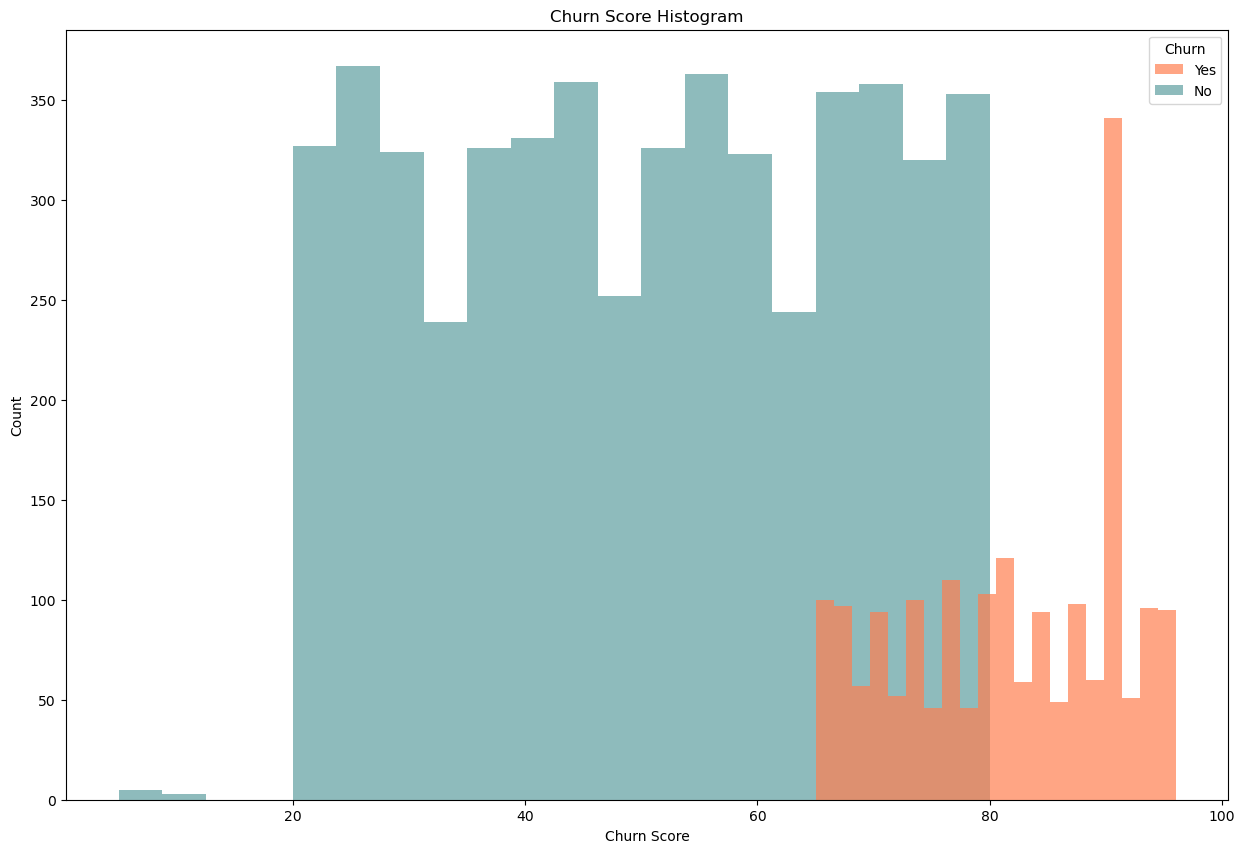

In [248]:
import matplotlib.pyplot as plt

# Column we are comparing against Churn Value
column_name = 'Churn Score'

# Define plot type (histogram)
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the histogram
ax.hist(df[df['Churn Value'] == 0][column_name], bins=20, alpha=0.7, label='No', color='cadetblue')
ax.hist(df[df['Churn Value'] == 1][column_name], bins=20, alpha=0.7, label='Yes', color='coral')

# Add title and labels to plot
plt.title(f'{column_name} Histogram')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add legend
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

In [249]:
df.groupby('Churn Label')['Churn Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,50.098183,17.702277,5.0,35.0,50.0,66.0,80.0
Yes,1869.0,81.777956,9.166870,65.0,74.0,83.0,90.0,96.0


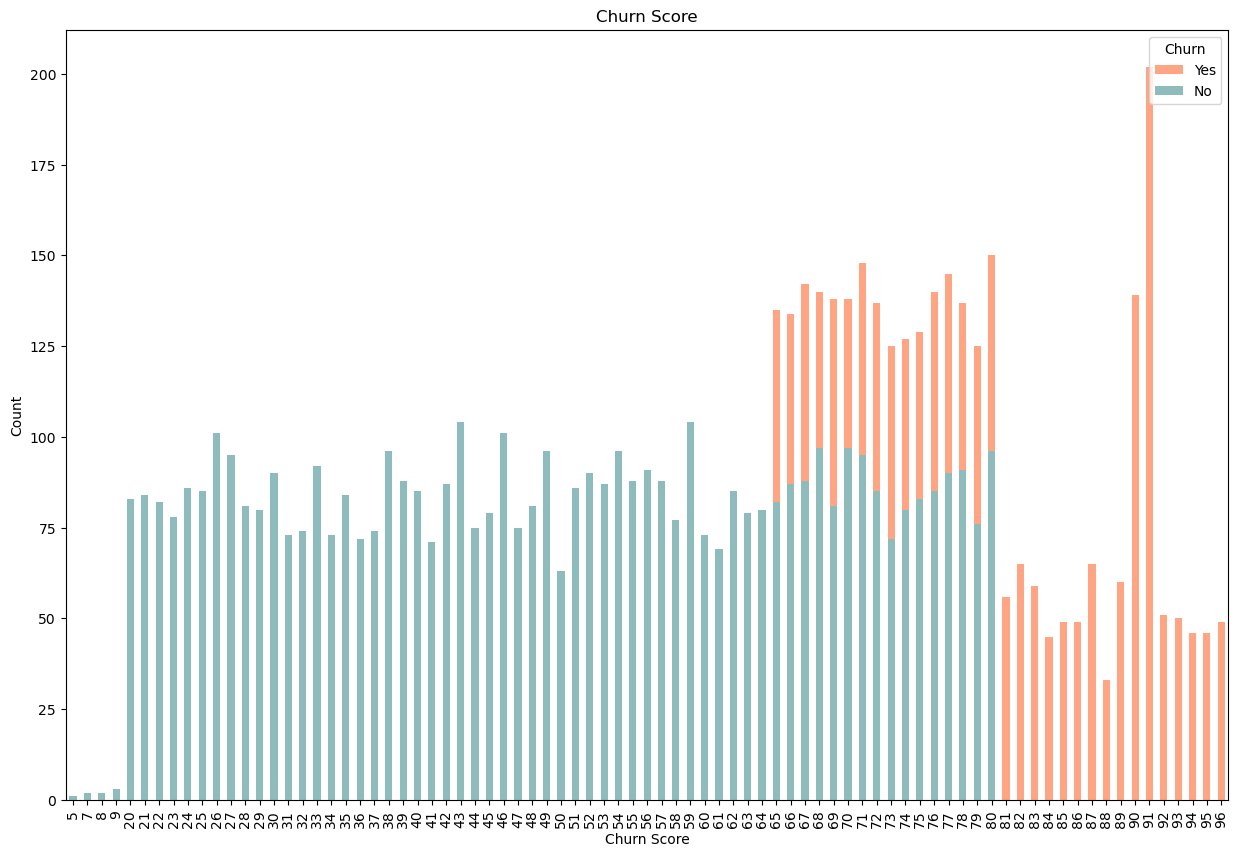

In [250]:
# Column we are comparing against Churn Value
column_name='Churn Score'
colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots(figsize=(15,10))
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, ax=ax)

# Add title and labels to plot
plt.title(f'{column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Show legend
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Churn Reason

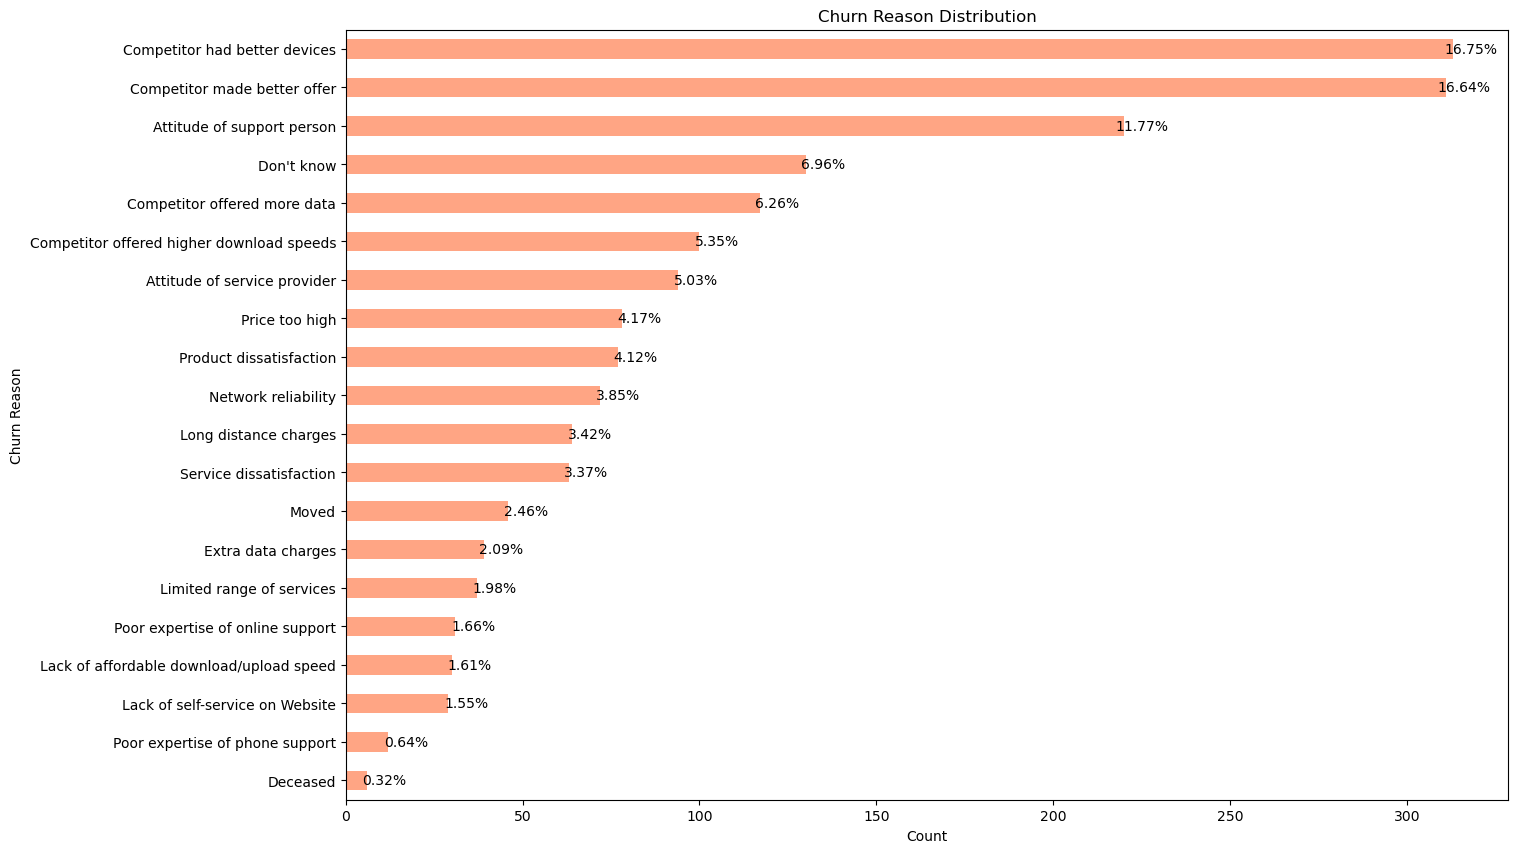

In [251]:
# Sorting by values
churn_reason=df.groupby('Churn Reason')['Churn Label'].value_counts(dropna=False).unstack()
churn_reason_sorted=churn_reason.sum(axis=1).sort_values(ascending=True).index
churn_reason_sorted_df=churn_reason.loc[churn_reason_sorted]

# Plot sorted values
ax=churn_reason_sorted_df.plot(kind='barh', stacked=True, rot=0, figsize=(15, 10), alpha=0.7, color='coral')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.title('Churn Reason Distribution')
    
# Add data labels with percentage value
totals = churn_reason_sorted_df.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(total + 5, i, f'{total / sum(totals) * 100:.2f}%', ha='center', va='center', fontsize=10, color='black')
    
# Remove lengend as only Churned customers
ax.get_legend().remove()

plt.show()

#### Satisfaction Score

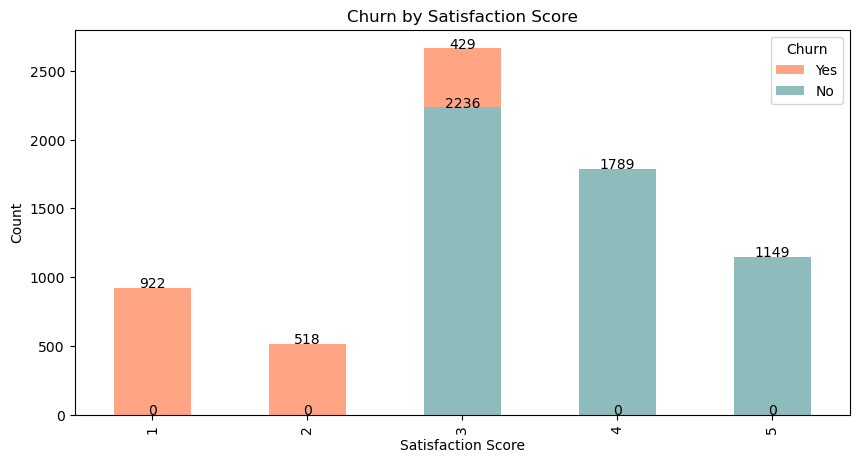

In [252]:
# Column we are comparing against Churn Value
column_name='Satisfaction Score'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

In [253]:
pivot_table = pd.pivot_table(df, values='Customer ID', index='Offer', columns='Churn Label', aggfunc='count', fill_value=0)
row_sums = pivot_table.sum(axis=1)
sorted_pivot_table = pivot_table.loc[row_sums.sort_values(ascending=False).index]
sorted_pivot_table

Churn Label,No,Yes
Offer,,
None,2826,1051
Offer B,723,101
Offer E,379,426
Offer D,441,161
Offer A,485,35
Offer C,320,95


### Demographics Features

#### Gender

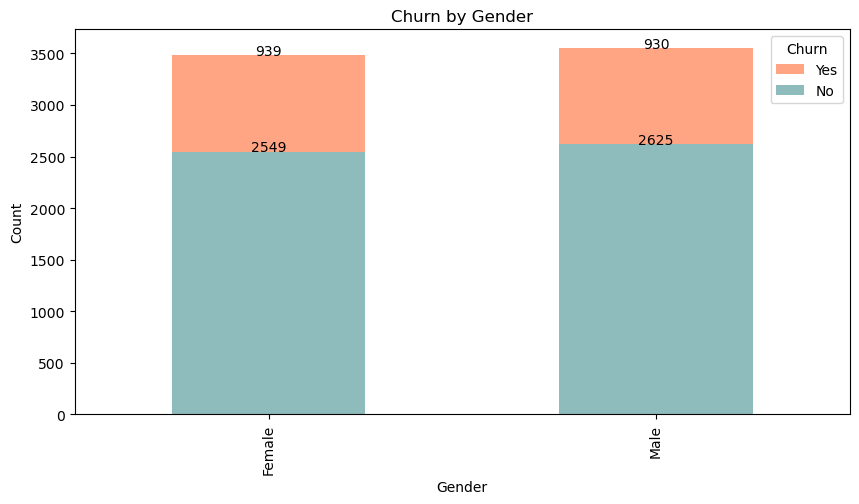

In [254]:
# Column we are comparing against Churn Value
column_name='Gender'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Senior Citizen

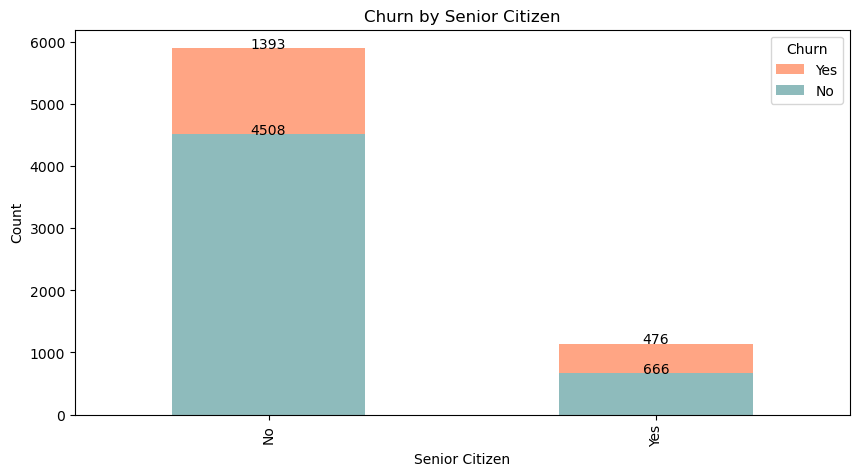

In [255]:
# Column we are comparing against Churn
column_name='Senior Citizen'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Partner

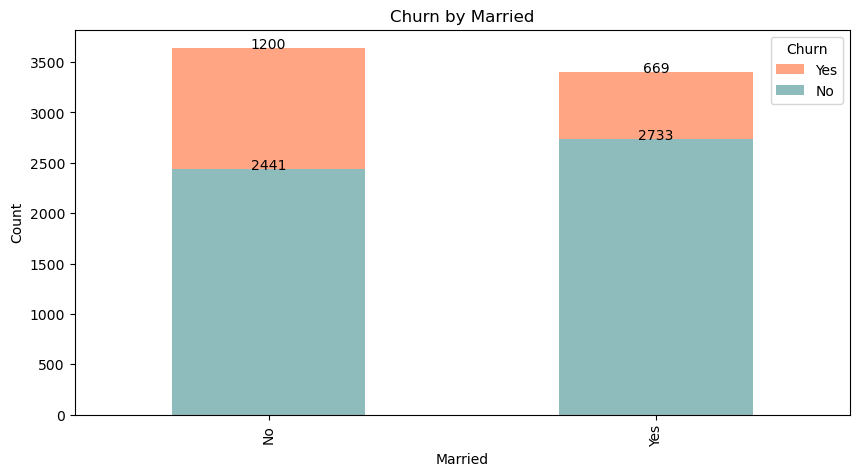

In [256]:
# Column we are comparing against Churn Value
column_name='Married'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Dependents

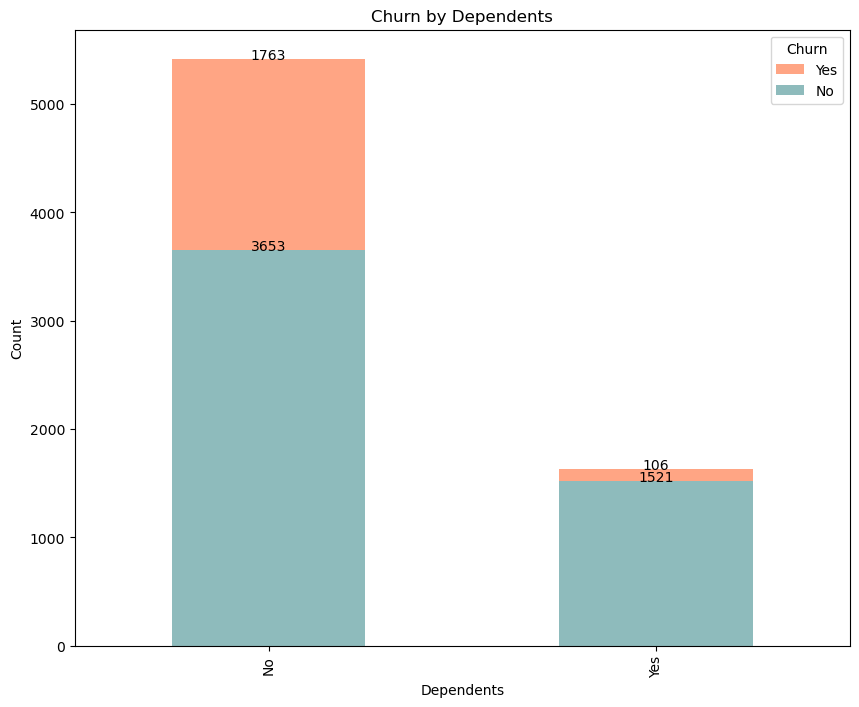

In [257]:
# Column we are comparing against Churn Value
column_name='Dependents'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 8), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

### Location

#### County

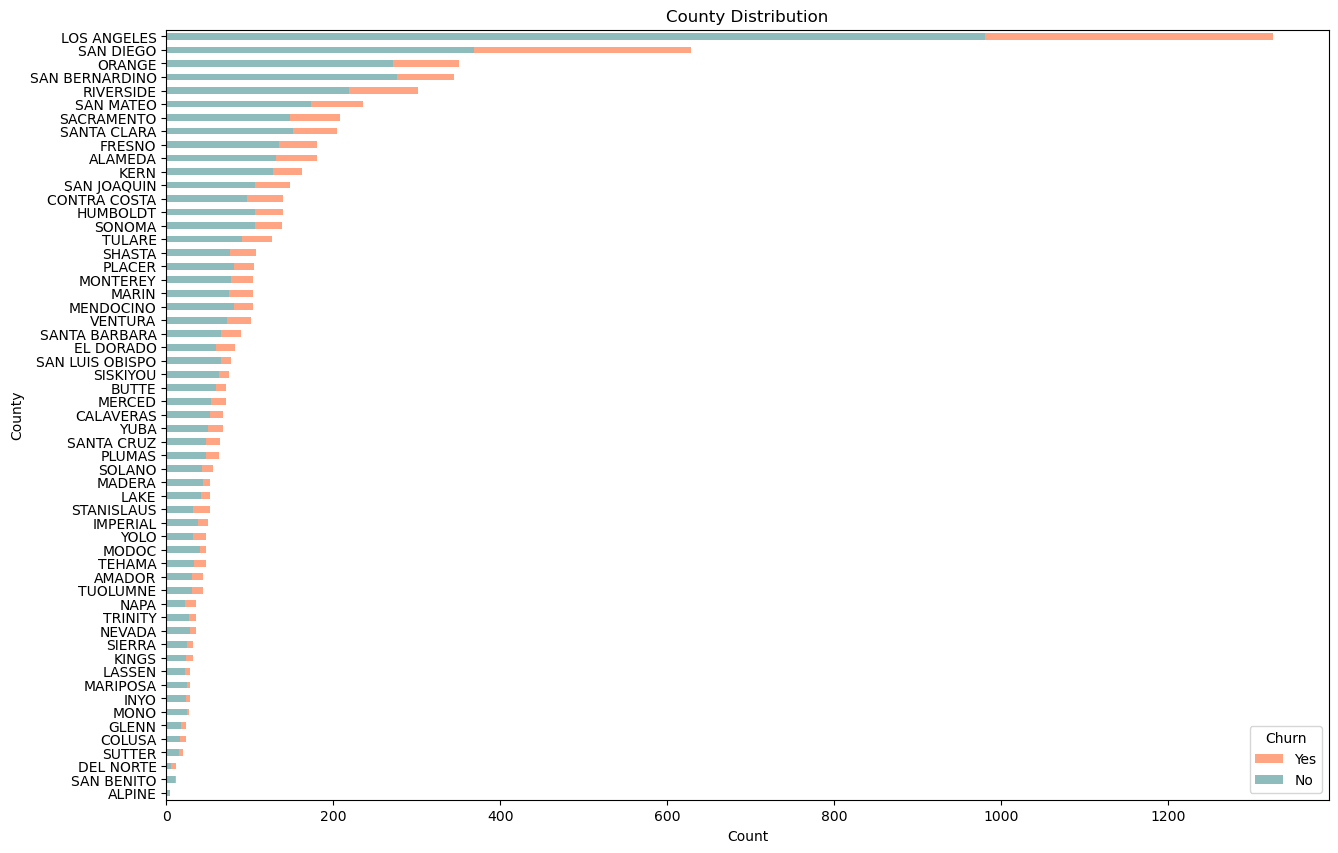

In [258]:
# Sorting by values
county=df.groupby('County')['Churn Label'].value_counts(dropna=False).unstack()
county_sorted=county.sum(axis=1).sort_values(ascending=True).index
county_sorted_df=county.loc[county_sorted]

colors = ['cadetblue', 'coral']

# Plot sorted values
ax=county_sorted_df.plot(kind='barh', stacked=True, rot=0, figsize=(15, 10), alpha=0.7, color=colors)
plt.xlabel('Count')
plt.ylabel('County')
plt.title('County Distribution')

plt.legend(title='Churn', reverse=True)

plt.show()

### Services

#### Tenure (Months)

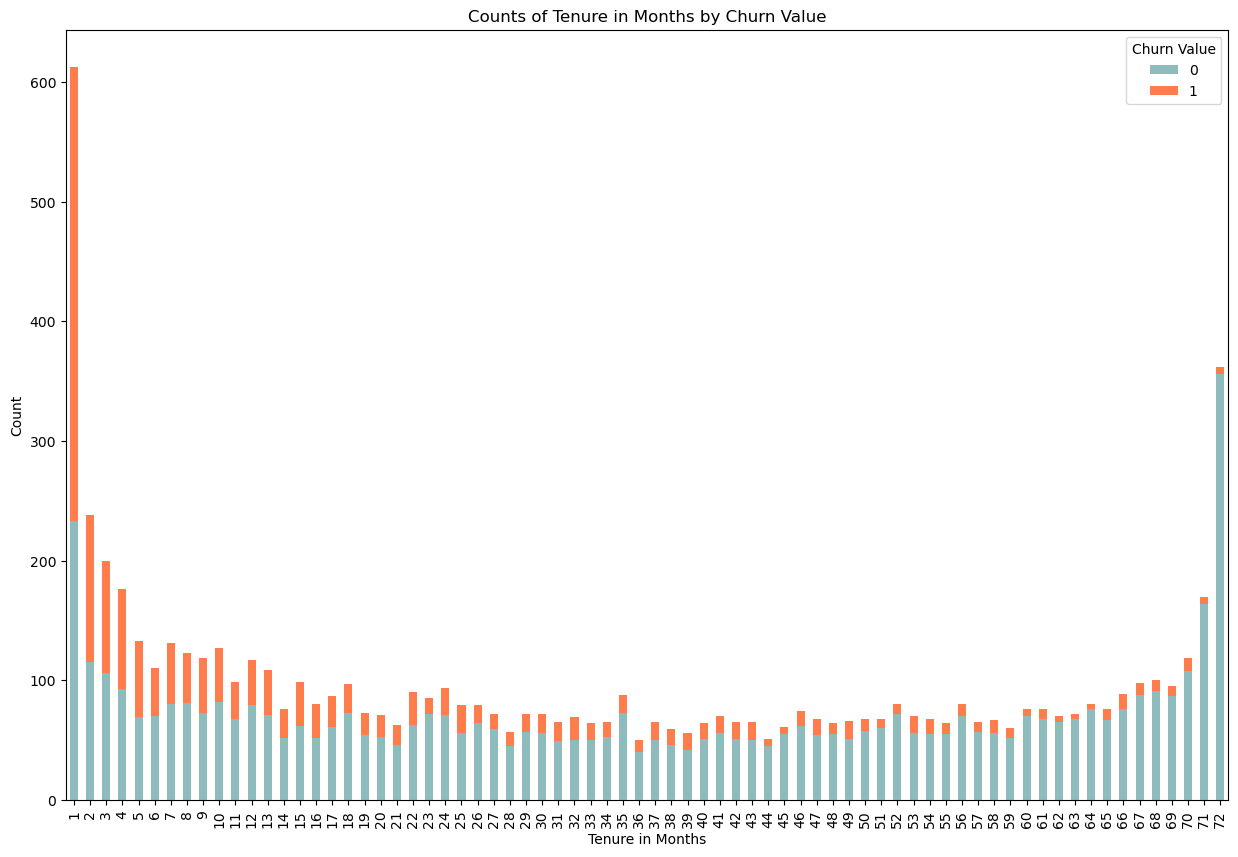

In [259]:
# Column we are comparing against Churn Value
column_name='Tenure in Months'
colors = ['cadetblue', 'orangered']

# Define plot type
fig, ax = plt.subplots(figsize=(15,10))
df.groupby([column_name, 'Churn Value']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, ax=ax)

# Add title and labels to plot
plt.title(f'Counts of {column_name} by Churn Value')
plt.xlabel(column_name)
plt.ylabel('Count')

# # Add data labels to plot
# for p in ax.patches:     
#     width, height = p.get_width(), p.get_height()     
#     x, y = p.get_xy()     
#     ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')     

# Show plot
plt.show()

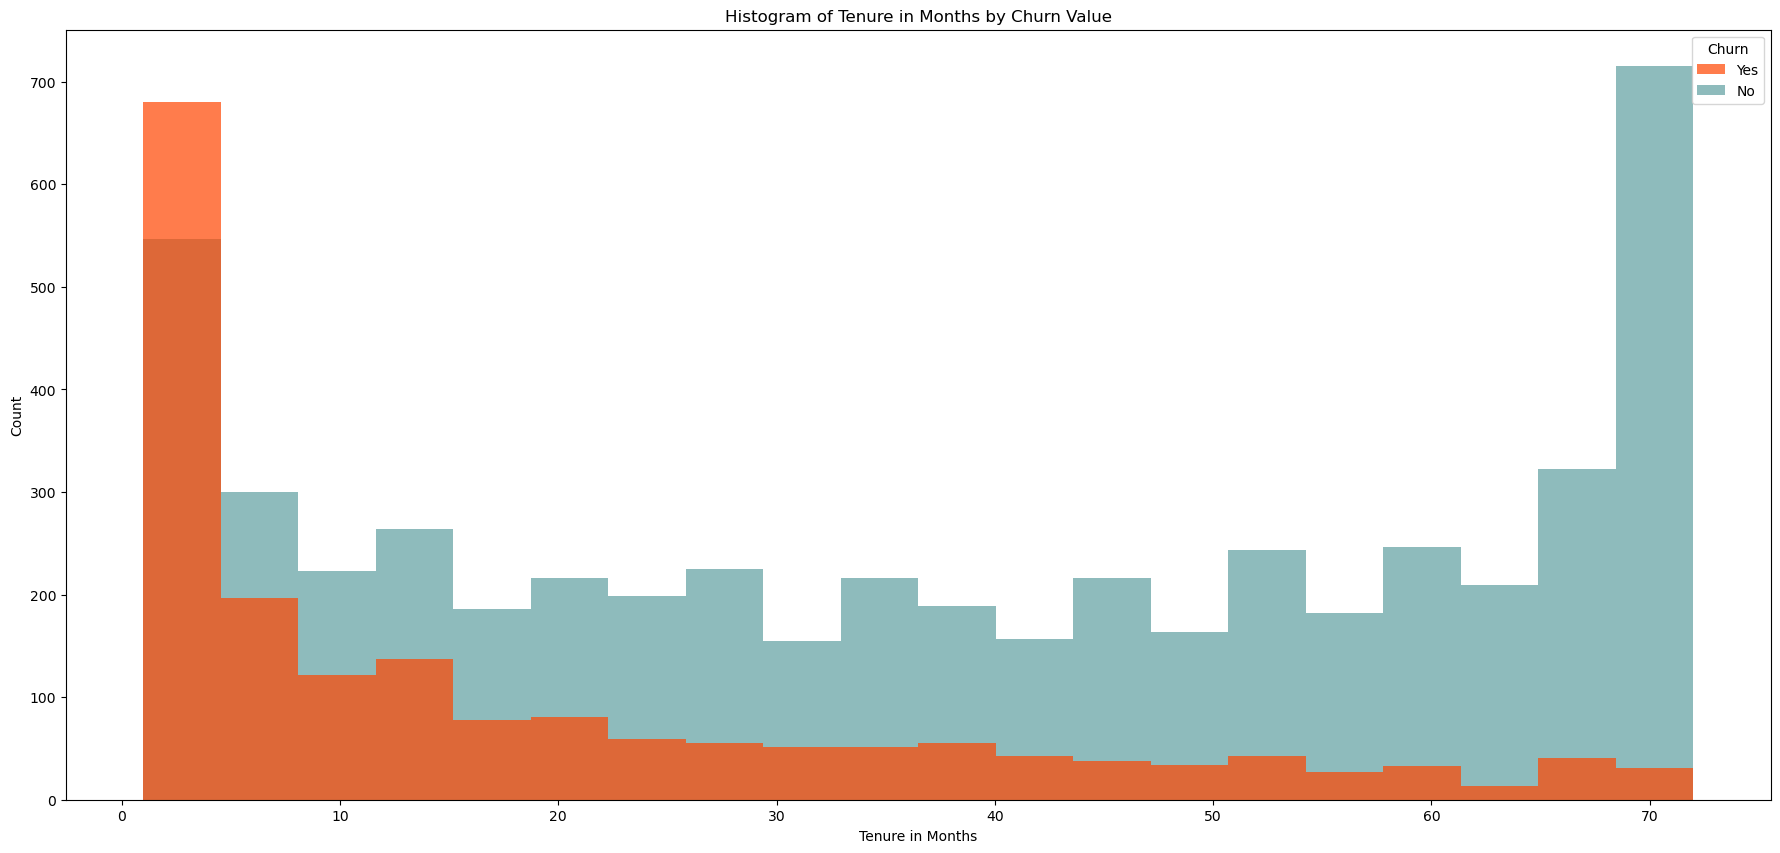

In [260]:
# Column we are comparing against Churn Value
column_name = 'Tenure in Months'

# Define plot type (histogram)
fig, ax = plt.subplots(figsize=(22, 10))

# Plot the histogram
ax.hist(df[df['Churn Value'] == 0][column_name], bins=20, alpha=0.7, label='No', color='cadetblue')
ax.hist(df[df['Churn Value'] == 1][column_name], bins=20, alpha=0.7, label='Yes', color='orangered')

# Add title and labels to plot
plt.title(f'Histogram of {column_name} by Churn Value')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add legend
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

**From the distribution below, we can see 50% of customers churn within the first 10 months.**

In [261]:
df.groupby('Churn Label')['Tenure in Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,37.591225,24.085029,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [125]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,LOS ANGELES,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,LOS ANGELES,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,LOS ANGELES,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,LOS ANGELES,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,LOS ANGELES,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,Landers,92285,SAN BERNARDINO,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,Adelanto,92301,SAN BERNARDINO,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,Amboy,92304,SAN BERNARDINO,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,Angelus Oaks,92305,SAN BERNARDINO,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,0,59,2793,NaN,NaN


**Group Tenure Months into equal size bins**

In [126]:
df['Tenure Months Group'] = pd.cut(df['Tenure in Months'], bins=range(0, df['Tenure in Months'].max() + 7, 6), right=False)
df['Tenure Months Group'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Tenure Months Group
Non-Null Count  Dtype   
--------------  -----   
7043 non-null   category
dtypes: category(1)
memory usage: 7.8 KB


In [128]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Tenure Months Group
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,LOS ANGELES,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,"[0, 6)"
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,LOS ANGELES,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,"[6, 12)"
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,LOS ANGELES,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,"[18, 24)"
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,LOS ANGELES,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,"[24, 30)"
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,LOS ANGELES,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges,"[36, 42)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,Landers,92285,SAN BERNARDINO,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,0,45,5306,NaN,NaN,"[72, 78)"
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,Adelanto,92301,SAN BERNARDINO,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,0,59,2140,NaN,NaN,"[24, 30)"
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,Amboy,92304,SAN BERNARDINO,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,0,71,5560,NaN,NaN,"[72, 78)"
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,Angelus Oaks,92305,SAN BERNARDINO,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,0,59,2793,NaN,NaN,"[6, 12)"


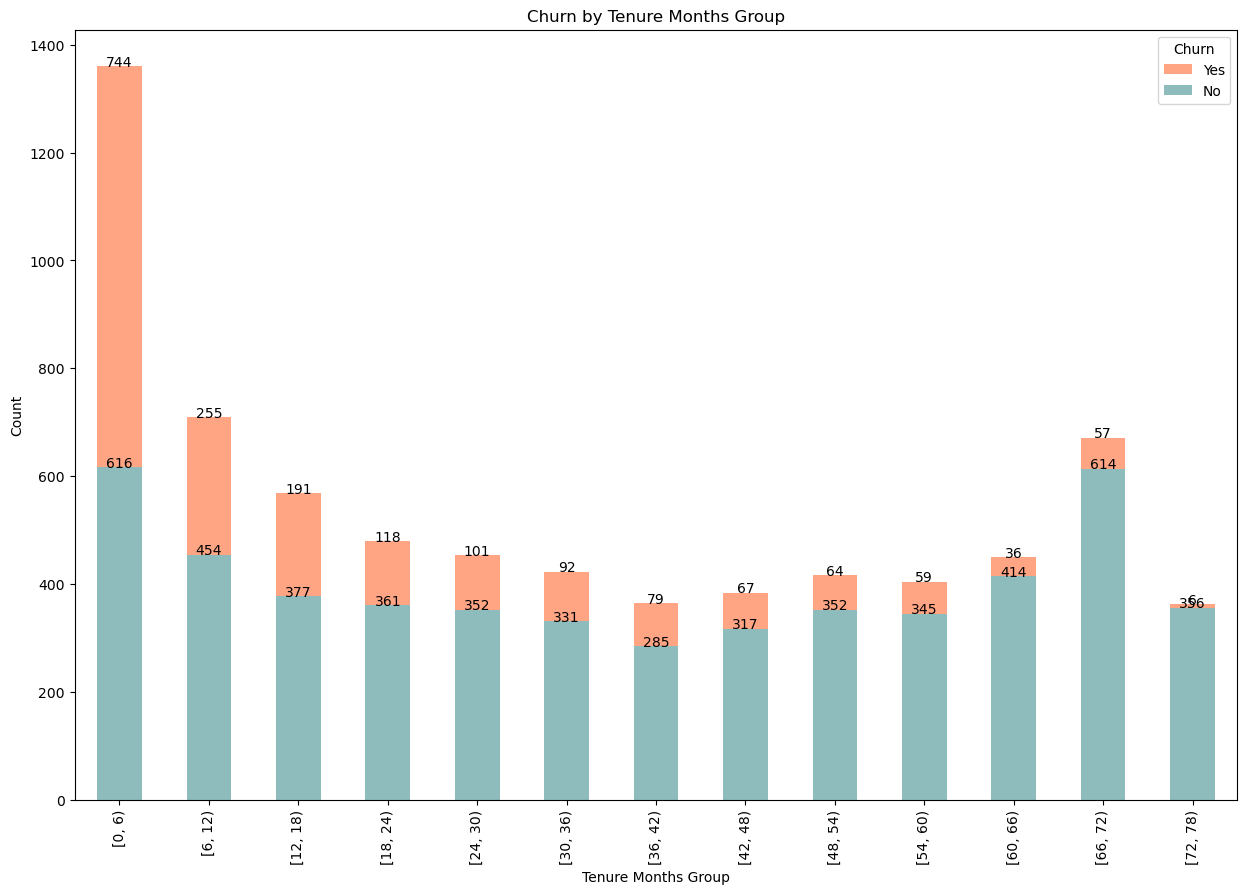

In [45]:
# Column we are comparing against Churn Value
column_name='Tenure Months Group'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(15, 10), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

**Churn Reason pivot by Tenure Months Group**

In [46]:
# Create a pivot table to count the occurrences of each "Churn Reason" per "Tenure_Group"
pivot_table = df.pivot_table(index='Tenure Months Group', columns='Churn Reason', aggfunc='size', fill_value=0)

# Sort the pivot table columns by the aggregated values in descending order
pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index]

# Print the pivot table with sorted columns
print("Pivot Table with Sorted Columns by Aggregated Value:")

pivot_table

Pivot Table with Sorted Columns by Aggregated Value:


Churn Reason,Competitor had better devices,Competitor made better offer,Attitude of support person,Don't know,Competitor offered more data,Competitor offered higher download speeds,Attitude of service provider,Price too high,Product dissatisfaction,Network reliability,Long distance charges,Service dissatisfaction,Moved,Extra data charges,Limited range of services,Poor expertise of online support,Lack of affordable download/upload speed,Lack of self-service on Website,Poor expertise of phone support,Deceased
Tenure Months Group,,,,,,,,,,,,,,,,,,,,
"[0, 6)",135,140,79,53,28,35,45,29,22,31,35,21,18,10,17,13,12,13,6,2
"[6, 12)",41,46,38,10,24,13,12,9,9,13,5,8,6,6,6,3,2,2,0,2
"[12, 18)",37,25,25,11,13,12,6,8,8,5,6,9,3,4,5,2,3,5,3,1
"[18, 24)",22,11,14,11,9,7,4,2,8,5,4,6,4,2,2,2,1,3,0,1
"[24, 30)",18,19,9,8,6,5,4,6,4,1,2,5,2,4,2,2,3,1,0,0
"[30, 36)",9,13,17,11,5,4,4,4,5,1,2,4,3,3,1,4,0,1,1,0
"[36, 42)",12,12,10,9,4,5,3,4,3,1,0,1,3,2,1,1,4,3,1,0
"[42, 48)",8,14,5,5,5,3,3,3,4,7,1,2,1,2,2,1,1,0,0,0
"[48, 54)",9,7,6,6,6,5,2,6,1,1,2,0,4,3,1,3,1,0,1,0


**Offers against Tenure**

In [47]:
df[['Offer', 'Tenure Months Group']]

,Offer,Tenure Months Group
0,None,"[0, 6)"
1,Offer E,"[6, 12)"
2,Offer D,"[18, 24)"
3,Offer C,"[24, 30)"
4,Offer C,"[36, 42)"
...,...,...
7038,None,"[72, 78)"
7039,Offer C,"[24, 30)"
7040,None,"[72, 78)"
7041,None,"[6, 12)"


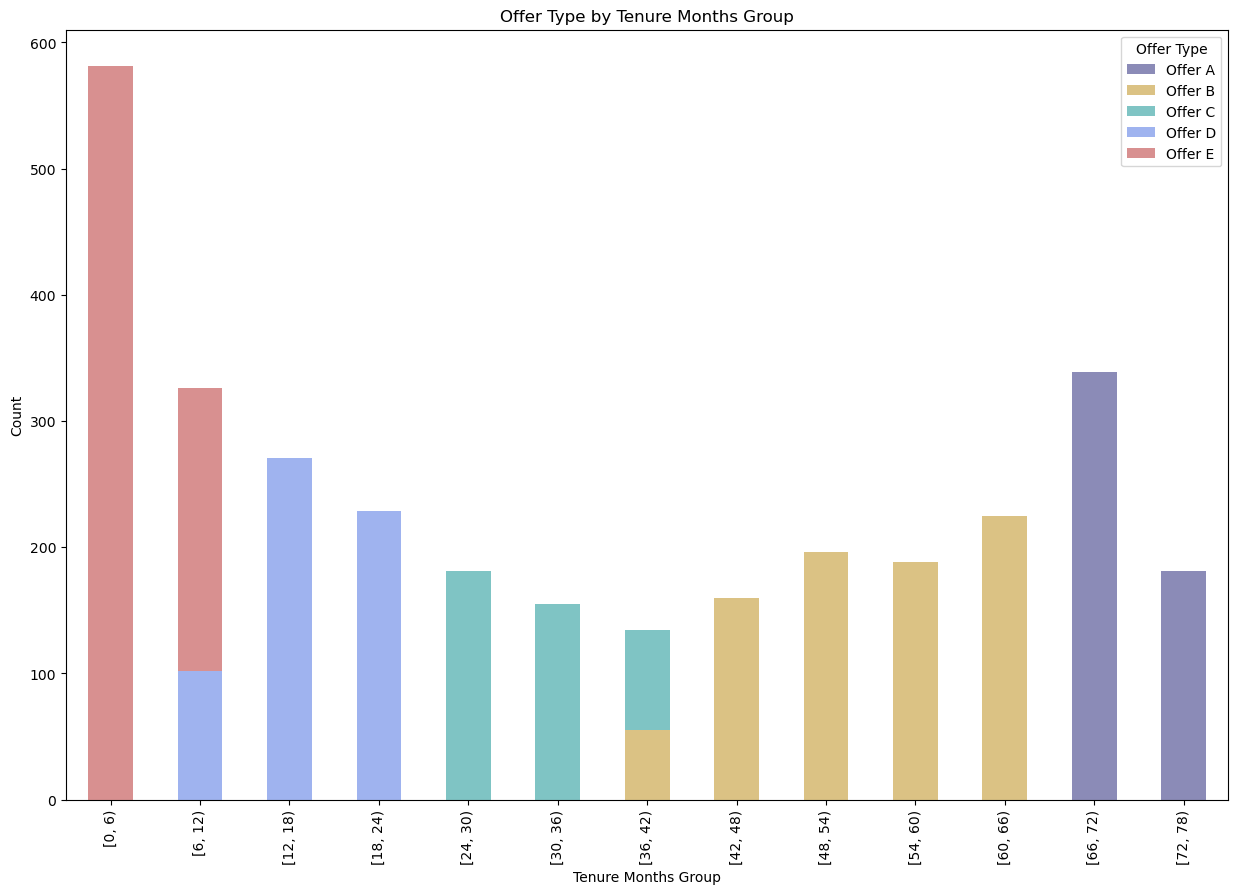

In [48]:
# Column we are comparing against Churn Value
column_name='Tenure Months Group'

colors = ['midnightblue', 'darkgoldenrod', 'darkcyan', 'royalblue', 'firebrick']

df_offers = df[df['Offer'] != 'None']

# Define plot type
fig, ax = plt.subplots()
df_offers.groupby([column_name, 'Offer']).size().unstack().plot(kind='bar', stacked=True, alpha=0.5, color=colors, figsize=(15, 10), ax=ax)

# Add title and labels to plot
plt.title(f'Offer Type by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')

# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Offer Type')

# Show plot
plt.show()

#### Phone Service

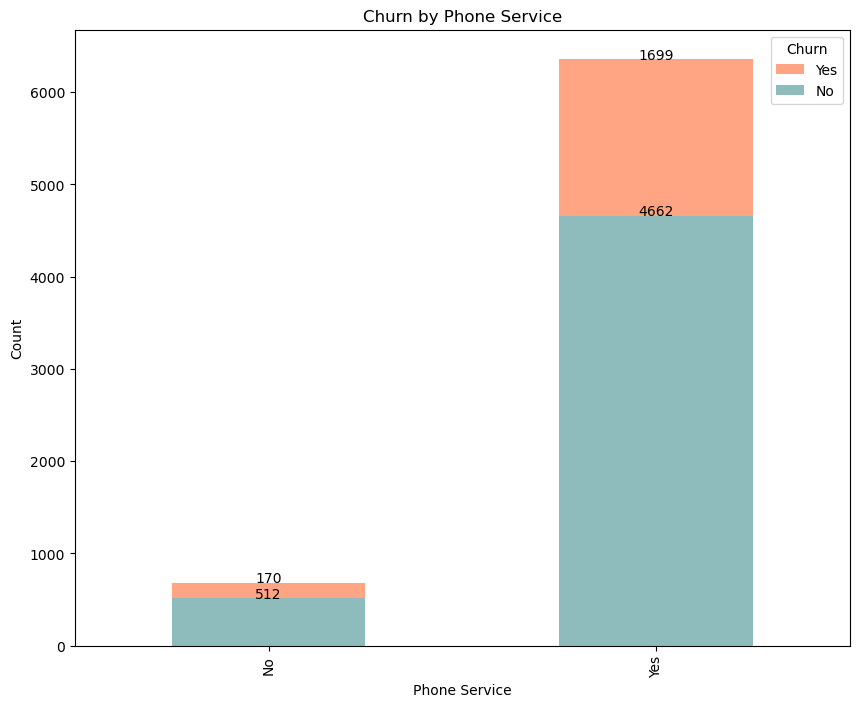

In [49]:
# Column we are comparing against Churn Value
column_name='Phone Service'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 8), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Multiple Lines

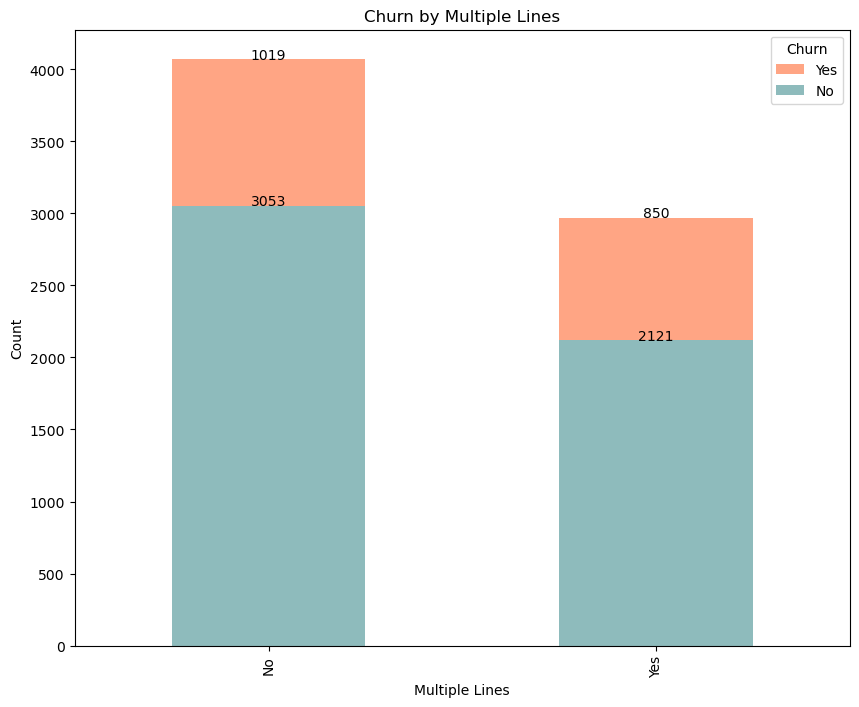

In [50]:
# Column we are comparing against Churn Value
column_name='Multiple Lines'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 8), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Internet Service

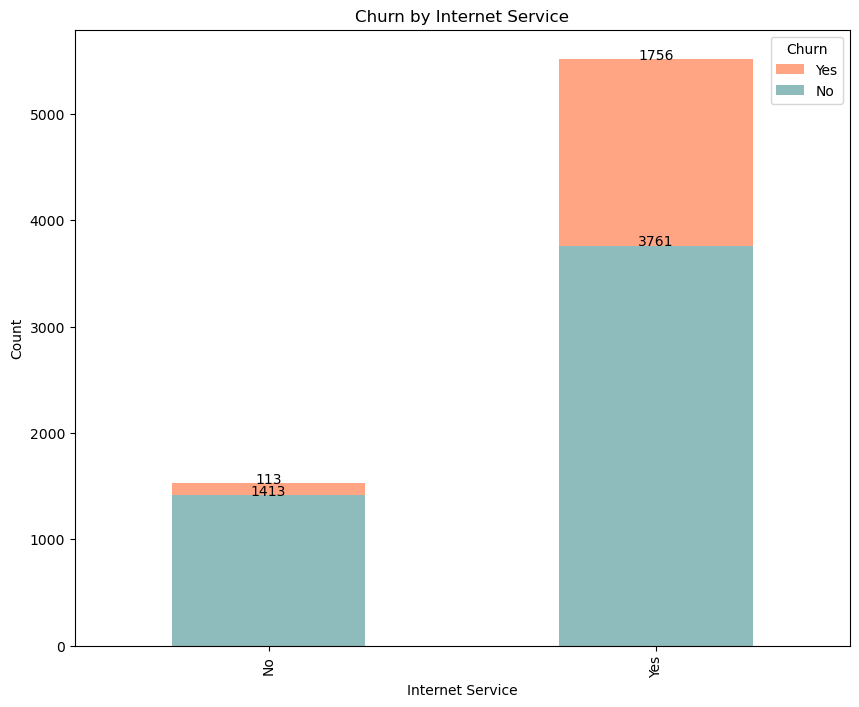

In [51]:
# Column we are comparing against Churn Value
column_name='Internet Service'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 8), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Online Security

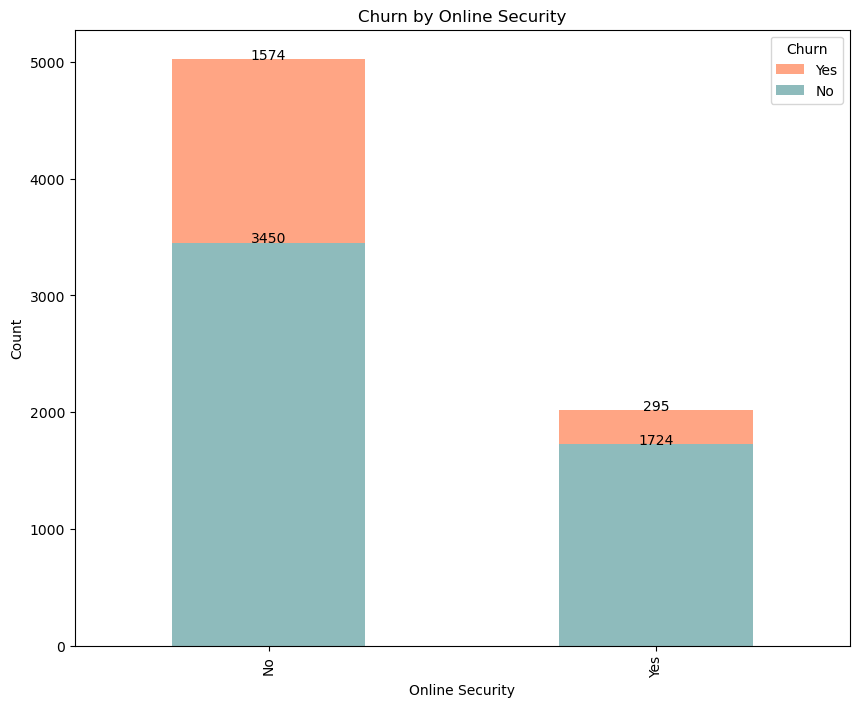

In [52]:
# Column we are comparing against Churn Value
column_name='Online Security'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 8), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Online Backup

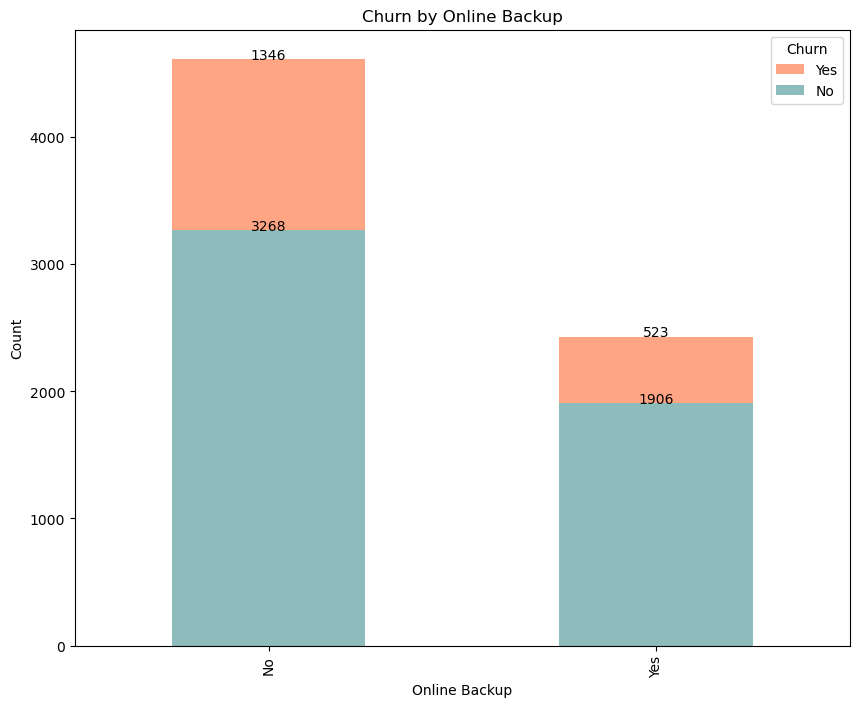

In [53]:
# Column we are comparing against Churn Value
column_name='Online Backup'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 8), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Device Protection

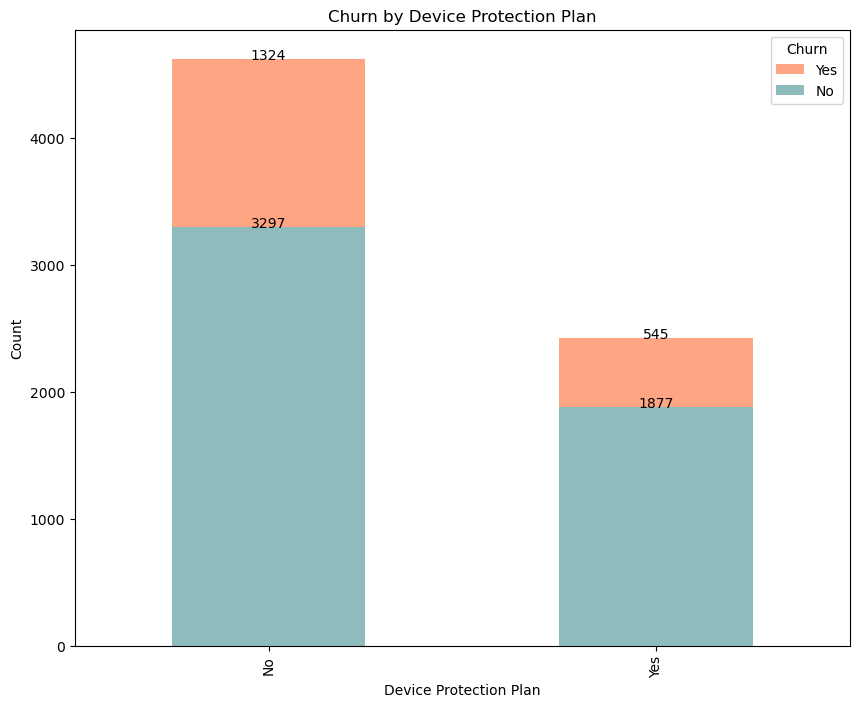

In [54]:
# Column we are comparing against Churn Value
column_name='Device Protection Plan'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 8), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Tech Support

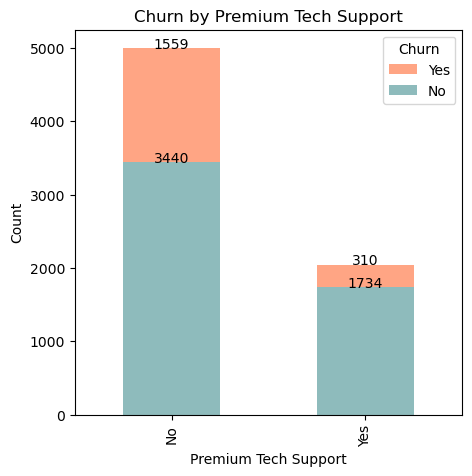

In [55]:
# Column we are comparing against Churn Value
column_name='Premium Tech Support'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(5, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Streaming TV

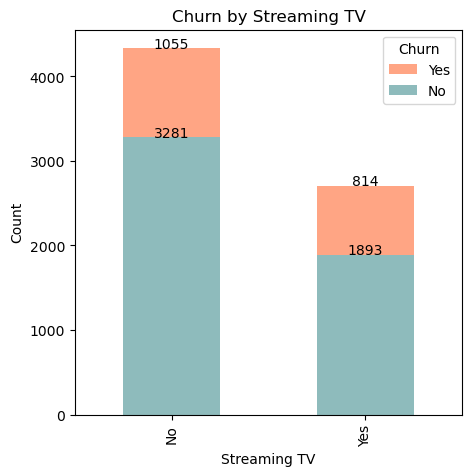

In [56]:
# Column we are comparing against Churn Value
column_name='Streaming TV'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(5, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Streaming Movies

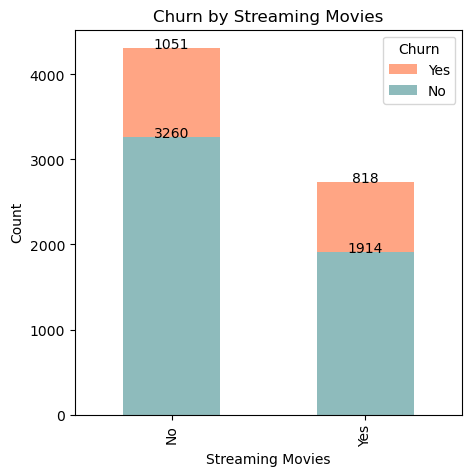

In [57]:
# Column we are comparing against Churn Value
column_name='Streaming Movies'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(5, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Contract

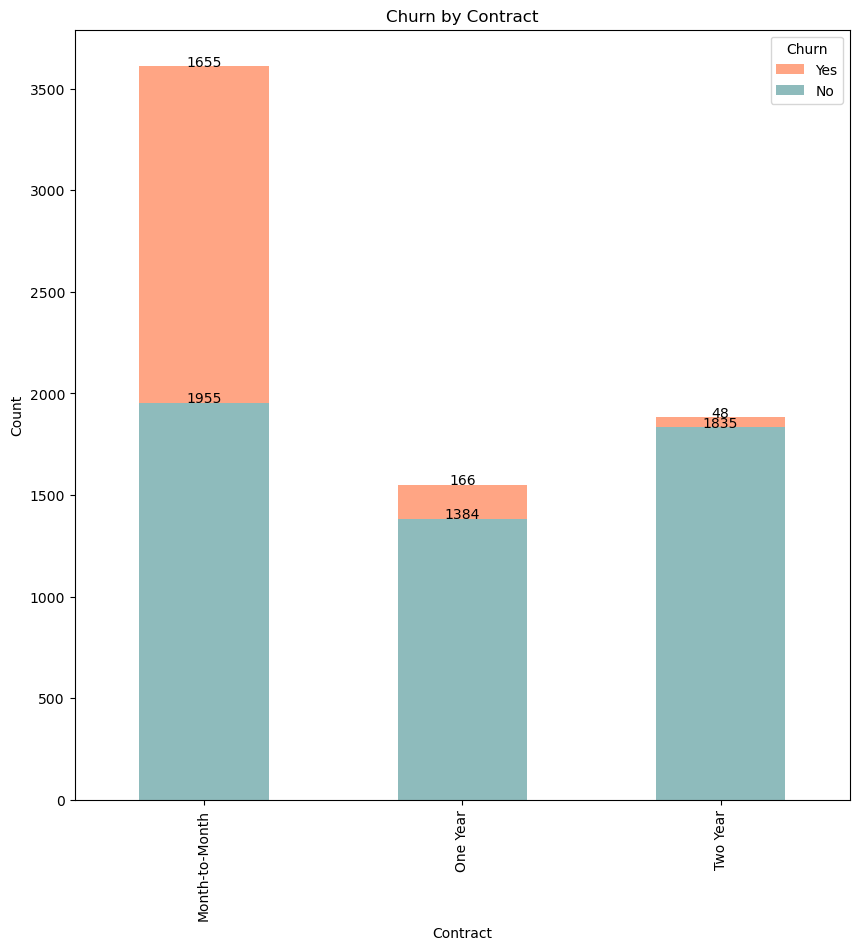

In [58]:
# Column we are comparing against Churn Value
column_name='Contract'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 10), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Paperless Billing

One of our assumptions for this feature was that customers enrolled in paperless billing where going to have a lower churn rate. However, below distribution shows us the opposite. Customers enrolled in paperless billing, have a higher churn propensity.

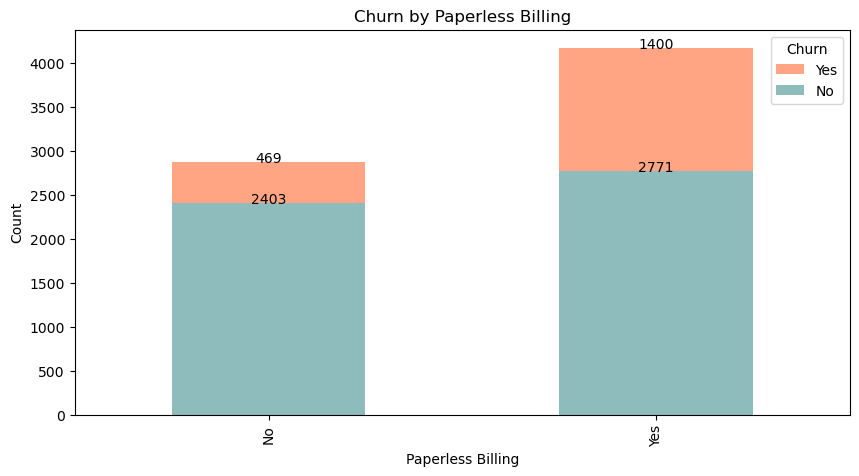

In [59]:
# Column we are comparing against Churn Value
column_name='Paperless Billing'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

#### Payment Method

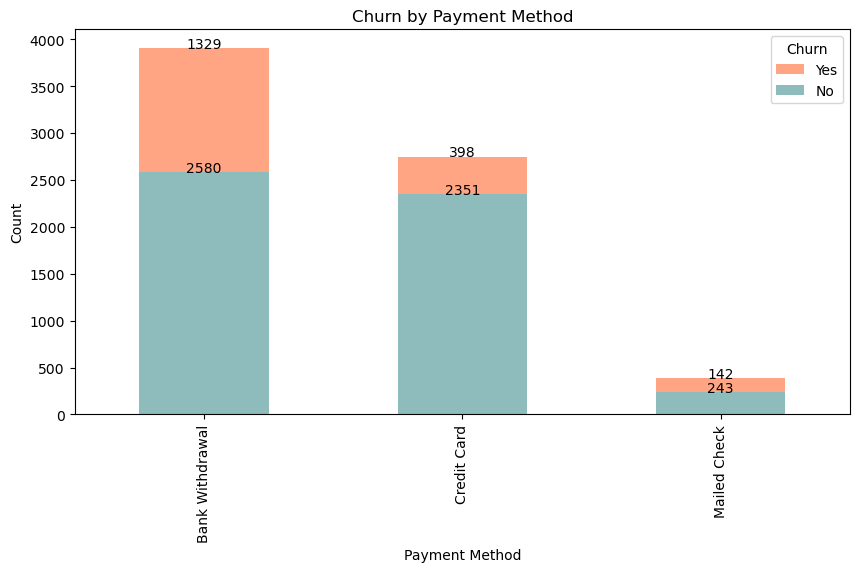

In [60]:
# Column we are comparing against Churn Value
column_name='Payment Method'

colors = ['cadetblue', 'coral']

# Define plot type
fig, ax = plt.subplots()
df.groupby([column_name, 'Churn Label']).size().unstack().plot(kind='bar', stacked=True, alpha=0.7, color=colors, figsize=(10, 5), ax=ax)

# Add title and labels to plot
plt.title(f'Churn by {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')

# Add data labels to plot
for p in ax.patches:     
    width, height = p.get_width(), p.get_height()     
    x, y = p.get_xy()     
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 0.1), ha='center')    
    
# Move the legend to the top-right corner
plt.legend(loc='upper right', title='Churn', reverse=True)

# Show plot
plt.show()

## Prediction

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [215]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,LOS ANGELES,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,LOS ANGELES,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,LOS ANGELES,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,LOS ANGELES,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,LOS ANGELES,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,Landers,92285,SAN BERNARDINO,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,Adelanto,92301,SAN BERNARDINO,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,Amboy,92304,SAN BERNARDINO,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,Angelus Oaks,92305,SAN BERNARDINO,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,0,59,2793,NaN,NaN


In [63]:
data=df.drop(
    ['Customer ID'
     #,'Gender'
     ,'Age'
     ,'Married'
     #,'Dependents'
     ,'Number of Dependents'
     ,'City'
     ,'Zip Code'
     #,'County'
     ,'Referred a Friend'
     ,'Number of Referrals'
     ,'Avg Monthly Long Distance Charges'
     #,'Multiple Lines'
     #,'Avg Monthly GB Download'
     ,'Tenure in Months'
     ,'Total Charges'
     ,'Total Refunds'
     #,'Total Extra Data Charges'
     #,'Total Long Distance Charges'
     ,'Total Revenue'
     ,'Churn Value'
     ,'Churn Score'
     ,'Customer Status'
     ,'CLTV'
     ,'Churn Category'
     ,'Churn Reason']
    ,axis=1)

data.rename(columns={"Churn Label": "Churn"}, inplace=True)
target=data.pop('Churn')
data.insert(0,'Churn',target)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        7043 non-null   object  
 1   Gender                       7043 non-null   object  
 2   Under 30                     7043 non-null   object  
 3   Senior Citizen               7043 non-null   object  
 4   Dependents                   7043 non-null   object  
 5   County                       7043 non-null   object  
 6   Offer                        7043 non-null   object  
 7   Phone Service                7043 non-null   object  
 8   Multiple Lines               7043 non-null   object  
 9   Internet Service             7043 non-null   object  
 10  Internet Type                7043 non-null   object  
 11  Avg Monthly GB Download      7043 non-null   int64   
 12  Online Security              7043 non-null   object  
 13  Onl

In [65]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['category']).columns.tolist()

In [66]:
categorical_columns

['Tenure Months Group']

In [67]:
# Encode categorical features
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

for column in categorical_columns:
    if data[column].nunique() > 2:  # Apply one-hot encoding if more than 2 categories
        one_hot_encoded = pd.get_dummies(data[column], prefix=column, drop_first=True)
        data = pd.concat([data, one_hot_encoded], axis=1)
        data.drop(column, axis=1, inplace=True)
    else:
        data[column] = label_encoder.fit_transform(data[column])

In [68]:
# Encode categorical features
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [69]:
data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [70]:
data.head(5)

,Churn,Gender,Under 30,Senior Citizen,Dependents,County,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,"Tenure Months Group_[6, 12)","Tenure Months Group_[12, 18)","Tenure Months Group_[18, 24)","Tenure Months Group_[24, 30)","Tenure Months Group_[30, 36)","Tenure Months Group_[36, 42)","Tenure Months Group_[42, 48)","Tenure Months Group_[48, 54)","Tenure Months Group_[54, 60)","Tenure Months Group_[60, 66)","Tenure Months Group_[66, 72)","Tenure Months Group_[72, 78)"
0,1,1,0,1,0,18,0,0,0,1,1,8,0,0,1,0,0,1,0,0,0,1,0,39.65,20,0.00,3,False,False,False,False,False,False,False,False,False,False,False,False
1,1,0,0,1,1,18,5,1,1,1,2,17,0,1,0,0,0,0,0,1,0,1,1,80.65,0,390.80,3,True,False,False,False,False,False,False,False,False,False,False,False
2,1,1,0,1,1,18,4,1,1,1,2,52,0,0,0,0,1,1,1,1,0,1,0,95.45,0,203.94,2,False,False,True,False,False,False,False,False,False,False,False,False
3,1,0,0,1,1,18,3,1,0,1,2,12,0,1,1,0,1,1,0,1,0,1,0,98.50,0,494.00,2,False,False,False,True,False,False,False,False,False,False,False,False
4,1,0,0,1,1,18,3,1,1,1,2,14,0,0,0,0,0,0,0,1,0,1,0,76.50,0,234.21,2,False,False,False,False,False,True,False,False,False,False,False,False


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         7043 non-null   int32  
 1   Gender                        7043 non-null   int32  
 2   Under 30                      7043 non-null   int32  
 3   Senior Citizen                7043 non-null   int32  
 4   Dependents                    7043 non-null   int32  
 5   County                        7043 non-null   int32  
 6   Offer                         7043 non-null   int32  
 7   Phone Service                 7043 non-null   int32  
 8   Multiple Lines                7043 non-null   int32  
 9   Internet Service              7043 non-null   int32  
 10  Internet Type                 7043 non-null   int32  
 11  Avg Monthly GB Download       7043 non-null   int64  
 12  Online Security               7043 non-null   int32  
 13  Onl

In [72]:
# Split the data into training and testing sets
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_test

,Gender,Under 30,Senior Citizen,Dependents,County,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,"Tenure Months Group_[6, 12)","Tenure Months Group_[12, 18)","Tenure Months Group_[18, 24)","Tenure Months Group_[24, 30)","Tenure Months Group_[30, 36)","Tenure Months Group_[36, 42)","Tenure Months Group_[42, 48)","Tenure Months Group_[48, 54)","Tenure Months Group_[54, 60)","Tenure Months Group_[60, 66)","Tenure Months Group_[66, 72)","Tenure Months Group_[72, 78)"
185,0,0,1,0,36,0,1,0,1,2,26,0,0,0,0,0,0,0,1,0,0,0,70.55,0,1266.65,3,False,False,False,False,False,False,True,False,False,False,False,False
2715,1,0,0,0,35,2,1,1,0,3,0,0,0,0,0,0,0,0,0,2,0,0,24.90,0,2358.00,4,False,False,False,False,False,False,False,True,False,False,False,False
3825,1,1,0,0,36,0,1,0,1,1,85,1,1,0,0,1,1,1,1,1,1,1,75.40,0,540.80,5,False,False,False,False,False,False,False,True,False,False,False,False
1807,0,0,0,1,18,4,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,1,19.25,0,319.11,1,True,False,False,False,False,False,False,False,False,False,False,False
132,1,0,1,0,32,0,1,1,1,0,6,0,0,0,0,1,1,1,1,0,1,0,95.25,0,412.10,1,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,19.80,0,83.10,4,False,True,False,False,False,False,False,False,False,False,False,False
315,0,0,1,0,43,3,1,1,1,2,17,0,0,0,0,0,0,0,1,0,1,0,76.25,0,997.15,3,False,False,False,False,False,True,False,False,False,False,False,False
2439,1,1,0,0,43,4,1,1,1,2,59,0,0,1,1,1,1,1,1,0,1,0,106.10,0,458.43,1,False,False,True,False,False,False,False,False,False,False,False,False
5002,0,0,0,1,29,3,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,19.90,0,107.28,4,False,False,False,True,False,False,False,False,False,False,False,False


In [74]:
y_test

185     1
2715    0
3825    0
1807    1
132     1
       ..
6366    0
315     1
2439    1
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int32

In [75]:
t = X_test.iloc[0]

# !pip install catboost

In [76]:
# Create and train multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(), 
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    #'K-Nearest Neighbors': KNeighborsClassifier(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process': GaussianProcessClassifier(),
    'CatBoost': CatBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    t = np.array(t)
    t = t.reshape(1,-1)
    print(model.predict(t))
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
    print(f"Model: {model_name}")
    print(report)

[0]
Model: Logistic Regression
              precision    recall  f1-score   support

    No Churn       0.94      0.95      0.94      1009
       Churn       0.88      0.84      0.86       400

    accuracy                           0.92      1409
   macro avg       0.91      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

[1]
Model: Naive Bayes
              precision    recall  f1-score   support

    No Churn       0.93      0.83      0.88      1009
       Churn       0.67      0.84      0.75       400

    accuracy                           0.84      1409
   macro avg       0.80      0.84      0.81      1409
weighted avg       0.86      0.84      0.84      1409

[1]
Model: Decision Tree
              precision    recall  f1-score   support

    No Churn       0.96      0.96      0.96      1009
       Churn       0.89      0.89      0.89       400

    accuracy                           0.94      1409
   macro avg       0.93      0.92      0.92      

[0]
Model: Random Forest
              precision    recall  f1-score   support

    No Churn       0.94      0.99      0.96      1009
       Churn       0.96      0.85      0.90       400

    accuracy                           0.95      1409
   macro avg       0.95      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409

[1]
Model: Ada Boost
              precision    recall  f1-score   support

    No Churn       0.95      0.96      0.96      1009
       Churn       0.90      0.88      0.89       400

    accuracy                           0.94      1409
   macro avg       0.93      0.92      0.92      1409
weighted avg       0.94      0.94      0.94      1409

[1]
Model: Gradient Boosting
              precision    recall  f1-score   support

    No Churn       0.95      0.98      0.96      1009
       Churn       0.94      0.86      0.90       400

    accuracy                           0.95      1409
   macro avg       0.94      0.92      0.93      1409

In [77]:
## Balancing with SMOTE

In [78]:
#!conda install -c conda-forge imbalanced-learn

In [79]:
#!pip install imblearn

In [80]:
#from imblearn.over_sampling import SMOTE

In [81]:
# import warnings
# warnings.filterwarnings('ignore')

[0]


Model: Logistic Regression
0.8921220723917672
              precision    recall  f1-score   support

    No Churn       0.93      0.92      0.92      1009
       Churn       0.81      0.81      0.81       400

    accuracy                           0.89      1409
   macro avg       0.87      0.87      0.87      1409
weighted avg       0.89      0.89      0.89      1409

[1]
Model: Naive Bayes
0.8537970191625266
              precision    recall  f1-score   support

    No Churn       0.91      0.88      0.90      1009
       Churn       0.72      0.79      0.75       400

    accuracy                           0.85      1409
   macro avg       0.82      0.83      0.82      1409
weighted avg       0.86      0.85      0.86      1409

[1]
Model: Decision Tree
0.9297374024130589
              precision    recall  f1-score   support

    No Churn       0.95      0.95      0.95      1009
       Churn       0.87      0.89      0.88       400

    accuracy                           0.93      1

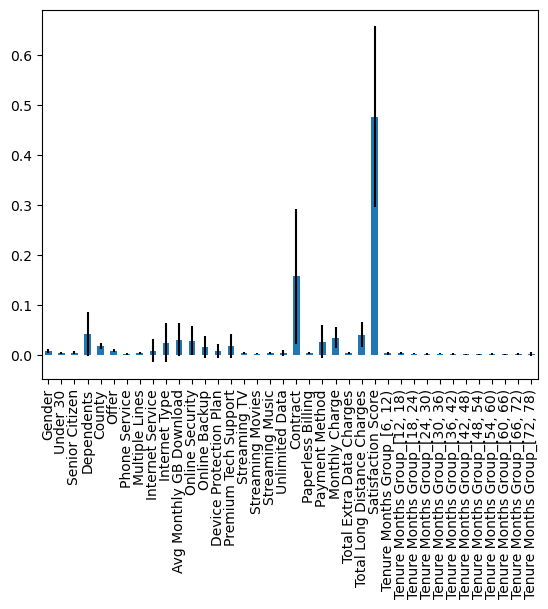

0.9389638041163946
              precision    recall  f1-score   support

    No Churn       0.95      0.97      0.96      1009
       Churn       0.92      0.86      0.89       400

    accuracy                           0.94      1409
   macro avg       0.93      0.91      0.92      1409
weighted avg       0.94      0.94      0.94      1409

[1]
Model: Ada Boost
0.9347054648687012
              precision    recall  f1-score   support

    No Churn       0.96      0.95      0.95      1009
       Churn       0.88      0.89      0.89       400

    accuracy                           0.93      1409
   macro avg       0.92      0.92      0.92      1409
weighted avg       0.93      0.93      0.93      1409

[0]
Model: Gradient Boosting
0.9396735273243435
              precision    recall  f1-score   support

    No Churn       0.95      0.97      0.96      1009
       Churn       0.91      0.88      0.89       400

    accuracy                           0.94      1409
   macro avg       0.

KeyboardInterrupt: 

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from tabulate import tabulate
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot as plt
import numpy as np

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessClassifier
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report
# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Identify categorical columns
# categorical_columns = data.select_dtypes(include=['category']).columns.tolist()

# # Encode categorical features
# label_encoder = LabelEncoder()
# one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

# for column in categorical_columns:
#     if data[column].nunique() > 2:  # Apply one-hot encoding if more than 2 categories
#         one_hot_encoded = pd.get_dummies(data[column], prefix=column, drop_first=True)
#         data = pd.concat([data, one_hot_encoded], axis=1)
#         data.drop(column, axis=1, inplace=True)
#     else:
#         data[column] = label_encoder.fit_transform(data[column])
        
# # Encode categorical features
# label_encoder = LabelEncoder()
# for column in data.columns:
#     if data[column].dtype == 'object':
#         data[column] = label_encoder.fit_transform(data[column])
        
# Split the data into training and testing sets
X = data.drop(columns=['Churn'])
y = data['Churn']
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Create and train multiple models on the balanced dataset
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(), 
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Gaussian Process': GaussianProcessClassifier(),
    'CatBoost': CatBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    #'LightGBM': LGBMClassifier(),
    #'XGBoost': XGBClassifier()
}

for model_name, model in models.items():

    
    
    

    model.fit(X_train_balanced, y_train_balanced)
    t = np.array(t)
    t = t.reshape(1,-1)
    print(model.predict(t))
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
    print(f"Model: {model_name}")
    if model_name == 'Random Forest':
        importances = model.feature_importances_
        std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
        forest_importances = pd.Series(importances, index=X.columns)

        fig, ax = plt.subplots()
        forest_importances.plot.bar(yerr=std, ax=ax)
        plt.show()
        
    print(model.score(X_test,y_test))
    print(report)

    


    # headers=['Theresholds', 'False Pos Rate', 'True Pos Rate']
    
    # ns_probs = [0 for _ in range(len(y_test))]
    # ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)



    d_test = model.predict_proba(X_test)
    d_test = d_test[:,1]
    # d_auc = roc_auc_score(y_test,d_test)
    # d_fpr, d_tpr, d_thr = roc_curve(y_test,d_test)

    
    # plt.text(0.6,0.4,'Model=%.3f'%(d_auc),fontsize=12)

    
    # plt.plot(d_fpr,d_tpr,marker='.',label="Model")
    # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate")
    # plt.legend()
    # plt.show()

    # yhat= model.predict(X_test)
    # d_precision, d_recall, _ = precision_recall_curve(y_test,d_test)
    # d_f1,d_auc = f1_score(y_test,yhat),auc(d_recall,d_precision)

    # print('Model f1=%.3f auc=%.3f'%(d_f1,d_auc))

    # ns = len(y_test[y_test==1])/len(y_test)

    
    # plt.text(0.4,0.55,'F1=%.3f auc=%.3f'%(d_f1,d_auc),fontsize=12)
    # plt.plot([0, 1], [ns, ns], linestyle='--', label='No Skill')
    # plt.plot(d_recall, d_precision, marker='.', label='Model')
    # plt.xlabel('Recall')
    # plt.ylabel('Precision')
    # plt.legend()
    # plt.show()



In [216]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,LOS ANGELES,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,LOS ANGELES,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,LOS ANGELES,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,LOS ANGELES,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,LOS ANGELES,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,Landers,92285,SAN BERNARDINO,No,0,72,None,Yes,22.77,No,No,None,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,Adelanto,92301,SAN BERNARDINO,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,Amboy,92304,SAN BERNARDINO,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,Angelus Oaks,92305,SAN BERNARDINO,Yes,1,11,None,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,0,59,2793,NaN,NaN


In [263]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [264]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,6207,1,78,0,1,0,0,0,554,90022,18,0,0,1,0,0,0.00,0,1,1,8,0,0,1,0,0,1,0,0,0,1,0,39.65,39.65,0.00,20,0.00,59.65,3,0,1,1,91,5433,1,5
1,5305,0,74,0,1,1,1,1,554,90063,18,1,1,8,5,1,48.85,1,1,2,17,0,1,0,0,0,0,0,1,0,1,1,80.65,633.30,0.00,0,390.80,1024.10,3,0,1,1,69,5302,1,3
2,1129,1,71,0,1,0,1,3,554,90065,18,0,0,18,4,1,11.33,1,1,2,52,0,0,0,0,1,1,1,1,0,1,0,95.45,1752.55,45.61,0,203.94,1910.88,2,0,1,1,81,3179,1,3
3,3208,0,78,0,1,1,1,1,448,90303,18,1,1,25,3,1,19.76,0,1,2,12,0,1,1,0,1,1,0,1,0,1,0,98.50,2514.50,13.43,0,494.00,2995.07,2,0,1,1,88,5337,2,11
4,3419,0,80,0,1,1,1,1,1072,90602,18,1,1,37,3,1,6.33,1,1,2,14,0,0,0,0,0,0,0,1,0,1,0,76.50,2868.15,0.00,0,234.21,3102.36,2,0,1,1,67,2793,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,0,30,0,0,0,0,0,514,92285,35,0,0,72,0,1,22.77,0,0,3,0,0,0,0,0,0,0,0,0,2,1,0,21.15,1419.40,19.31,0,1639.44,3039.53,5,2,0,0,45,5306,5,20
7039,4853,1,38,0,0,1,1,2,2,92301,35,1,1,24,3,1,36.05,1,1,0,24,1,0,1,1,1,1,1,1,1,1,2,84.80,1990.50,48.23,0,865.20,2807.47,3,2,0,0,59,2140,5,20
7040,1525,0,30,0,0,1,1,2,22,92304,35,1,4,72,0,1,29.66,1,1,2,59,0,1,1,0,1,1,1,1,1,1,1,103.20,7362.90,45.38,0,2135.52,9453.04,4,2,0,0,71,5560,5,20
7041,3367,0,32,0,0,1,1,2,26,92305,35,1,1,11,0,0,0.00,0,1,1,17,1,0,0,0,0,0,0,1,0,1,0,29.60,346.45,27.24,0,0.00,319.21,4,2,0,0,59,2793,5,20


In [270]:
df1 = df.drop(columns=['Churn Label','Customer Status', 'Churn Score', 'Churn Category', 'Churn Reason','Satisfaction Score'])

In [277]:
df2=df.drop(
    ['Customer ID'
     #,'Gender'
     ,'Age'
     ,'Married'
     #,'Dependents'
     ,'Number of Dependents'
     ,'City'
     ,'Zip Code'
     #,'County'
     ,'Referred a Friend'
     ,'Number of Referrals'
     ,'Avg Monthly Long Distance Charges'
     #,'Multiple Lines'
     #,'Avg Monthly GB Download'
     #,'Tenure in Months'
     ,'Total Charges'
     ,'Total Refunds'
     #,'Total Extra Data Charges'
     #,'Total Long Distance Charges'
     ,'Total Revenue'
     #,'Churn Value'
     ,'Churn Label'
     ,'Churn Score'
     ,'Customer Status'
     ,'CLTV'
     ,'Churn Category'
     ,'Churn Reason']
    ,axis=1)

In [271]:
df1

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Value,CLTV
0,6207,1,78,0,1,0,0,0,554,90022,18,0,0,1,0,0,0.00,0,1,1,8,0,0,1,0,0,1,0,0,0,1,0,39.65,39.65,0.00,20,0.00,59.65,1,5433
1,5305,0,74,0,1,1,1,1,554,90063,18,1,1,8,5,1,48.85,1,1,2,17,0,1,0,0,0,0,0,1,0,1,1,80.65,633.30,0.00,0,390.80,1024.10,1,5302
2,1129,1,71,0,1,0,1,3,554,90065,18,0,0,18,4,1,11.33,1,1,2,52,0,0,0,0,1,1,1,1,0,1,0,95.45,1752.55,45.61,0,203.94,1910.88,1,3179
3,3208,0,78,0,1,1,1,1,448,90303,18,1,1,25,3,1,19.76,0,1,2,12,0,1,1,0,1,1,0,1,0,1,0,98.50,2514.50,13.43,0,494.00,2995.07,1,5337
4,3419,0,80,0,1,1,1,1,1072,90602,18,1,1,37,3,1,6.33,1,1,2,14,0,0,0,0,0,0,0,1,0,1,0,76.50,2868.15,0.00,0,234.21,3102.36,1,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,0,30,0,0,0,0,0,514,92285,35,0,0,72,0,1,22.77,0,0,3,0,0,0,0,0,0,0,0,0,2,1,0,21.15,1419.40,19.31,0,1639.44,3039.53,0,5306
7039,4853,1,38,0,0,1,1,2,2,92301,35,1,1,24,3,1,36.05,1,1,0,24,1,0,1,1,1,1,1,1,1,1,2,84.80,1990.50,48.23,0,865.20,2807.47,0,2140
7040,1525,0,30,0,0,1,1,2,22,92304,35,1,4,72,0,1,29.66,1,1,2,59,0,1,1,0,1,1,1,1,1,1,1,103.20,7362.90,45.38,0,2135.52,9453.04,0,5560
7041,3367,0,32,0,0,1,1,2,26,92305,35,1,1,11,0,0,0.00,0,1,1,17,1,0,0,0,0,0,0,1,0,1,0,29.60,346.45,27.24,0,0.00,319.21,0,2793


In [278]:
df2

,Gender,Under 30,Senior Citizen,Dependents,County,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,Churn Value
0,1,0,1,0,18,1,0,0,0,1,1,8,0,0,1,0,0,1,0,0,0,1,0,39.65,20,0.00,3,1
1,0,0,1,1,18,8,5,1,1,1,2,17,0,1,0,0,0,0,0,1,0,1,1,80.65,0,390.80,3,1
2,1,0,1,1,18,18,4,1,1,1,2,52,0,0,0,0,1,1,1,1,0,1,0,95.45,0,203.94,2,1
3,0,0,1,1,18,25,3,1,0,1,2,12,0,1,1,0,1,1,0,1,0,1,0,98.50,0,494.00,2,1
4,0,0,1,1,18,37,3,1,1,1,2,14,0,0,0,0,0,0,0,1,0,1,0,76.50,0,234.21,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,35,72,0,1,0,0,3,0,0,0,0,0,0,0,0,0,2,1,0,21.15,0,1639.44,5,0
7039,1,0,0,1,35,24,3,1,1,1,0,24,1,0,1,1,1,1,1,1,1,1,2,84.80,0,865.20,3,0
7040,0,0,0,1,35,72,0,1,1,1,2,59,0,1,1,0,1,1,1,1,1,1,1,103.20,0,2135.52,4,0
7041,0,0,0,1,35,11,0,0,0,1,1,17,1,0,0,0,0,0,0,1,0,1,0,29.60,0,0.00,4,0


<BarContainer object of 39 artists>

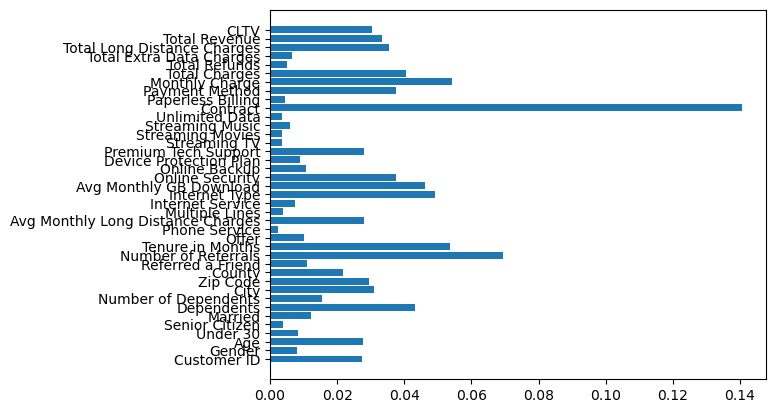

In [279]:
X=df1.drop(columns=['Churn Value'])
y=df1['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train,y_train)

clf=RandomForestClassifier(random_state=42)
clf.fit(X_train_balanced,y_train_balanced)

plt.barh(X_train_balanced.columns,clf.feature_importances_)

<BarContainer object of 27 artists>

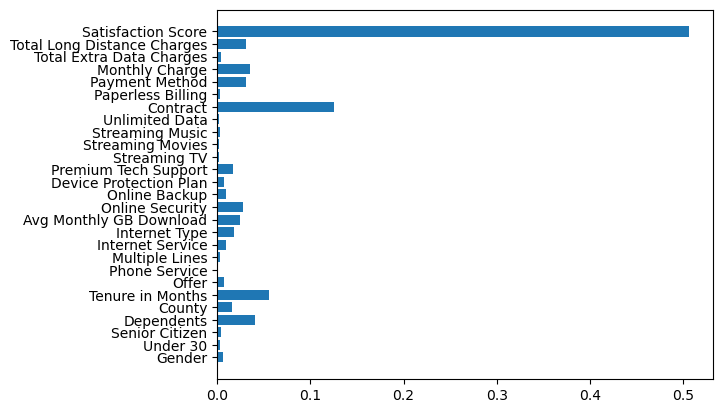

In [280]:
X1=df2.drop(columns=['Churn Value'])
y1=df2['Churn Value']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2, random_state=42)
X_train_balanced1, y_train_balanced1 = smote.fit_resample(X_train1,y_train1)

clf1=RandomForestClassifier(random_state=42)
clf1.fit(X_train_balanced1,y_train_balanced1)

plt.barh(X_train_balanced1.columns,clf1.feature_importances_)

#### With Satisfaction Score

In [273]:
clf.score(X_test,y_test)

0.8246983676366217

#### Without Satisfaction Score

In [281]:
clf1.score(X_test1,y_test1)

0.943222143364088

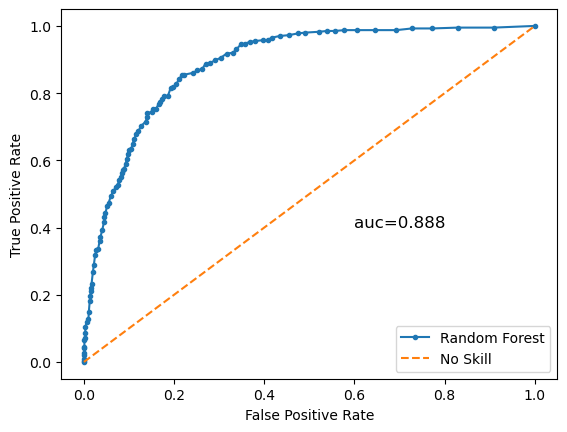

In [274]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

headers=['Theresholds', 'False Pos Rate', 'True Pos Rate']
## Graph code from https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)



d_test = clf.predict_proba(X_test)
d_test = d_test[:,1]
d_auc = roc_auc_score(y_test,d_test)
d_fpr, d_tpr, d_thr = roc_curve(y_test,d_test)

plt.text(0.6,0.4,'auc=%.3f'%(d_auc),fontsize=12)
plt.plot(d_fpr,d_tpr,marker='.',label="Random Forest")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Random Forest: f1=0.690 auc=0.742


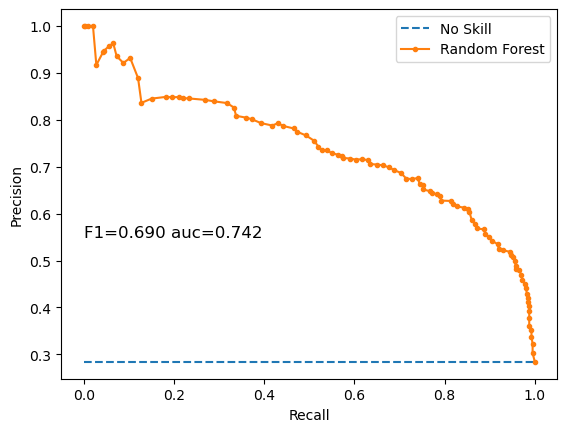

In [275]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc



yhat= clf.predict(X_test)
d_precision, d_recall, _ = precision_recall_curve(y_test,d_test)
d_f1,d_auc = f1_score(y_test,yhat),auc(d_recall,d_precision)

print('Random Forest: f1=%.3f auc=%.3f'%(d_f1,d_auc))

ns = len(y_test[y_test==1])/len(y_test)
plt.text(0,0.55,'F1=%.3f auc=%.3f'%(d_f1,d_auc),fontsize=12)
plt.plot([0, 1], [ns, ns], linestyle='--', label='No Skill')
plt.plot(d_recall, d_precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

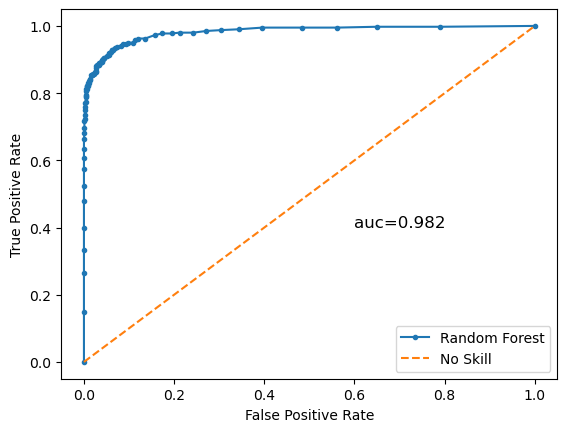

In [282]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

headers=['Theresholds', 'False Pos Rate', 'True Pos Rate']
## Graph code from https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
ns_probs = [0 for _ in range(len(y_test1))]
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)



d_test = clf1.predict_proba(X_test1)
d_test = d_test[:,1]
d_auc = roc_auc_score(y_test1,d_test)
d_fpr, d_tpr, d_thr = roc_curve(y_test1,d_test)

plt.text(0.6,0.4,'auc=%.3f'%(d_auc),fontsize=12)
plt.plot(d_fpr,d_tpr,marker='.',label="Random Forest")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Random Forest: f1=0.896 auc=0.969


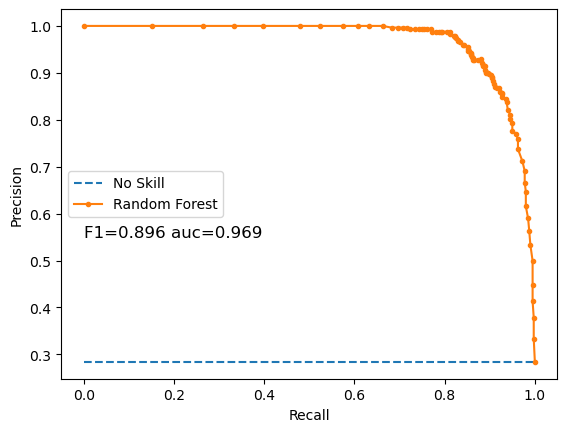

In [283]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc



yhat= clf1.predict(X_test1)
d_precision, d_recall, _ = precision_recall_curve(y_test1,d_test)
d_f1,d_auc = f1_score(y_test1,yhat),auc(d_recall,d_precision)

print('Random Forest: f1=%.3f auc=%.3f'%(d_f1,d_auc))

ns = len(y_test1[y_test1==1])/len(y_test1)
plt.text(0,0.55,'F1=%.3f auc=%.3f'%(d_f1,d_auc),fontsize=12)
plt.plot([0, 1], [ns, ns], linestyle='--', label='No Skill')
plt.plot(d_recall, d_precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

<Axes: >

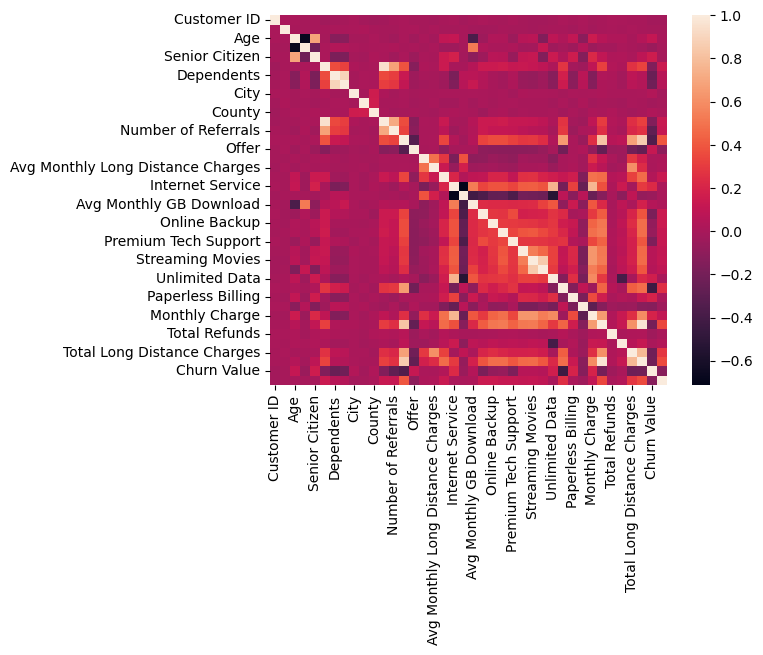

In [284]:
import seaborn as sns

corr = df1.corr()
sns.heatmap(corr)

In [286]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,County,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Value,CLTV
Customer ID,1.000,0.006,0.006,-0.004,-0.002,-0.027,-0.016,-0.008,0.007,-0.015,-0.028,-0.021,-0.002,0.008,-0.004,-0.006,-0.011,0.002,0.006,-0.014,0.000,0.015,-0.000,-0.004,0.004,-0.004,-0.013,-0.011,-0.006,0.016,-0.002,0.012,-0.004,0.000,0.015,0.006,-0.002,-0.000,-0.017,-0.017
Gender,0.006,1.000,0.002,-0.003,-0.002,-0.002,0.005,0.006,0.011,0.021,-0.001,-0.004,-0.009,0.005,0.017,-0.006,0.010,-0.008,-0.006,0.003,-0.014,-0.017,-0.014,-0.002,-0.009,-0.008,-0.010,-0.008,-0.001,-0.000,-0.012,0.010,-0.015,-0.000,0.005,-0.002,0.011,0.003,-0.009,-0.007
Age,0.006,0.002,1.000,-0.673,0.682,-0.004,-0.125,-0.119,-0.007,-0.008,0.012,-0.005,-0.025,0.010,-0.029,0.010,-0.012,0.103,0.117,0.001,-0.377,-0.038,0.036,0.028,-0.044,0.060,0.073,-0.155,0.084,0.028,0.101,-0.112,0.145,0.060,0.024,0.025,0.003,0.048,0.116,-0.002
Under 30,-0.004,-0.003,-0.673,1.000,-0.219,0.015,0.042,0.036,0.014,-0.001,0.007,0.016,0.023,-0.000,0.005,-0.009,0.009,-0.035,-0.036,-0.009,0.523,0.032,0.005,0.004,0.021,-0.016,-0.010,0.124,-0.032,-0.006,-0.039,0.044,-0.044,-0.014,-0.012,0.012,-0.002,-0.012,-0.055,-0.008
Senior Citizen,-0.002,-0.002,0.682,-0.219,1.000,0.016,-0.174,-0.168,-0.008,-0.013,0.020,0.010,-0.027,0.016,-0.043,0.009,-0.001,0.143,0.183,-0.014,-0.102,-0.039,0.067,0.059,-0.061,0.105,0.120,-0.148,0.140,0.032,0.157,-0.143,0.220,0.103,0.029,0.033,0.011,0.085,0.151,-0.003
Married,-0.027,-0.002,-0.004,0.015,0.016,1.000,0.363,0.324,0.021,-0.002,0.009,0.950,0.673,0.380,-0.127,0.018,0.010,0.142,-0.001,-0.002,0.057,0.143,0.141,0.154,0.120,0.125,0.117,0.089,0.019,0.278,-0.015,-0.035,0.097,0.318,0.040,0.018,0.264,0.329,-0.150,0.138
Dependents,-0.016,0.005,-0.125,0.042,-0.174,0.363,1.000,0.888,-0.009,0.013,0.009,0.347,0.307,0.132,-0.041,0.001,-0.006,-0.028,-0.172,0.068,0.075,0.050,0.003,-0.022,0.029,-0.058,-0.073,-0.036,-0.128,0.173,-0.119,0.073,-0.144,0.031,0.022,-0.016,0.086,0.050,-0.249,0.058
Number of Dependents,-0.008,0.006,-0.119,0.036,-0.168,0.324,0.888,1.000,-0.005,0.016,0.008,0.309,0.278,0.108,-0.031,-0.010,-0.007,-0.030,-0.153,0.059,0.130,0.042,0.002,-0.020,0.022,-0.053,-0.065,-0.033,-0.114,0.147,-0.107,0.061,-0.132,0.023,0.014,-0.014,0.069,0.038,-0.219,0.050
City,0.007,0.011,-0.007,0.014,-0.008,0.021,-0.009,-0.005,1.000,-0.008,0.154,0.021,-0.004,0.017,-0.009,0.003,-0.001,0.010,0.007,0.004,0.013,0.009,0.003,0.007,-0.014,0.022,0.016,0.016,0.005,-0.004,0.016,0.010,0.016,0.019,0.008,0.009,0.004,0.017,0.037,-0.011
Zip Code,-0.015,0.021,-0.008,-0.001,-0.013,-0.002,0.013,0.016,-0.008,1.000,0.159,-0.001,0.001,0.007,-0.015,-0.009,0.006,-0.021,-0.017,0.008,-0.011,0.009,-0.004,0.006,0.017,0.003,0.003,0.003,-0.012,0.017,-0.014,0.018,-0.011,0.002,-0.004,-0.015,0.005,0.003,-0.016,-0.003
